<a href="https://colab.research.google.com/github/RickyF404/Tesi/blob/main/Isolation_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
import numpy as np
import matplotlib.pyplot as plt
import gdown

In [2]:
url_no_temp = "https://drive.google.com/uc?id=1jerpsOqjogEnnriBkHOrDDEeh1wJry_o"
output_no_temp = "data_no_temperature.csv"
gdown.download(url_no_temp, output_no_temp)

url_temp = " https://drive.google.com/uc?id=1RofjUHZS_UAnbF6Xe74jTp9z4Mmk7swH"
output_temp = "data_temperature.csv"
gdown.download(url_temp, output_temp)

Downloading...
From: https://drive.google.com/uc?id=1jerpsOqjogEnnriBkHOrDDEeh1wJry_o
To: /content/data_no_temperature.csv
100%|██████████| 1.44M/1.44M [00:00<00:00, 63.1MB/s]
Downloading...
From:  https://drive.google.com/uc?id=1RofjUHZS_UAnbF6Xe74jTp9z4Mmk7swH
To: /content/data_temperature.csv
100%|██████████| 1.66M/1.66M [00:00<00:00, 40.4MB/s]


'data_temperature.csv'

# Dataset senza temperatura

In [ ]:
df = pd.read_csv("/content/data_no_temperature.csv", parse_dates=["timestamp"])
df = df.sort_values("timestamp")
df["month"] = df["timestamp"].dt.to_period("M")
months = sorted(df["month"].unique())

for i in range(1, len(months)):
  train_months = months[:i]
  val_months = months[i:]

  train_data = df[df["month"].isin(train_months)]
  val_data = df[df["month"].isin(val_months)]

  #preprocessing
  scaler = StandardScaler()
  X_train = scaler.fit_transform(train_data.drop(columns = ["timestamp", "month"]))
  X_val = scaler.transform(val_data.drop(columns = ["timestamp", "month"]))

  iso = IsolationForest(
      contamination=0.01,
      random_state=42,
      n_estimators = 200
  )
  iso.fit(X_train)

  preds = iso.predict(X_val)
  anomaly_rate = np.mean(preds == -1)*100
  print(f"Train su {i} mesi -> {anomaly_rate:.2f}% anomalie")

/tmp/ipython-input-1486964070.py:3: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df["month"] = df["timestamp"].dt.to_period("M")


Train su 1 mesi -> 23.39% anomalie
Train su 2 mesi -> 25.32% anomalie
Train su 3 mesi -> 26.31% anomalie
Train su 4 mesi -> 19.52% anomalie
Train su 5 mesi -> 12.25% anomalie
Train su 6 mesi -> 7.44% anomalie
Train su 7 mesi -> 5.60% anomalie
Train su 8 mesi -> 1.73% anomalie
Train su 9 mesi -> 0.85% anomalie
Train su 10 mesi -> 0.89% anomalie
Train su 11 mesi -> 0.89% anomalie
Train su 12 mesi -> 0.87% anomalie
Train su 13 mesi -> 1.21% anomalie
Train su 14 mesi -> 1.35% anomalie
Train su 15 mesi -> 1.49% anomalie
Train su 16 mesi -> 2.23% anomalie
Train su 17 mesi -> 3.11% anomalie
Train su 18 mesi -> 4.01% anomalie
Train su 19 mesi -> 4.85% anomalie


# Dataset con temperatura

In [ ]:
df = pd.read_csv("/content/data_temperature.csv", parse_dates=["timestamp"])
df = df.sort_values("timestamp")
df["month"] = df["timestamp"].dt.to_period("M")
months = sorted(df["month"].unique())

for i in range(1, len(months)):
  train_months = months[:i]
  val_months = months[i:]

  train_data = df[df["month"].isin(train_months)]
  val_data = df[df["month"].isin(val_months)]

  #preprocessing
  scaler = StandardScaler()
  X_train = scaler.fit_transform(train_data.drop(columns = ["timestamp", "month"]))
  X_val = scaler.transform(val_data.drop(columns = ["timestamp", "month"]))

  iso = IsolationForest(
      contamination=0.01,
      random_state=42,
      n_estimators = 200
  )
  iso.fit(X_train)

  preds = iso.predict(X_val)
  anomaly_rate = np.mean(preds == -1)*100
  print(f"Train su {i} mesi -> {anomaly_rate:.2f}% anomalie")

/tmp/ipython-input-2581415040.py:3: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df["month"] = df["timestamp"].dt.to_period("M")


Train su 1 mesi -> 41.07% anomalie
Train su 2 mesi -> 45.09% anomalie
Train su 3 mesi -> 49.17% anomalie
Train su 4 mesi -> 32.08% anomalie
Train su 5 mesi -> 20.87% anomalie
Train su 6 mesi -> 11.49% anomalie
Train su 7 mesi -> 6.00% anomalie
Train su 8 mesi -> 1.56% anomalie
Train su 9 mesi -> 0.93% anomalie
Train su 10 mesi -> 1.13% anomalie
Train su 11 mesi -> 0.99% anomalie
Train su 12 mesi -> 1.08% anomalie
Train su 13 mesi -> 1.39% anomalie
Train su 14 mesi -> 1.52% anomalie
Train su 15 mesi -> 1.74% anomalie
Train su 16 mesi -> 2.45% anomalie
Train su 17 mesi -> 3.95% anomalie
Train su 18 mesi -> 5.45% anomalie
Train su 19 mesi -> 2.93% anomalie


# Finestre temporali senza temperatura

In [ ]:
df_original = pd.read_csv("/content/data_no_temperature.csv", encoding = "utf-8")
df_original["timestamp"] = pd.to_datetime(df_original["timestamp"])
df_original["timestamp"] = df_original["timestamp"].dt.tz_localize(None)
df_original = df_original.sort_values("timestamp")

end = "2025-01-01"
df = df_original[(df_original["timestamp"] < end)]

In [3]:
def anomaly_rate_IF(train_df, valid_df, features):
  scaler = StandardScaler()
  # scaler = RobustScaler()
  X_train = scaler.fit_transform(train_df[features])
  X_val = scaler.transform(valid_df[features])

  iso = IsolationForest(
      contamination=0.01,
      random_state=42,
      n_estimators = 200
  )
  iso.fit(X_train)

  preds = iso.predict(X_val)
  anomaly_rate = np.mean(preds == -1)
  return anomaly_rate

In [ ]:
def create_fake_month(df, frac_per_month, random_state):
  rng = np.random.default_rng(seed=random_state) # generatore casuale con seed
  df["day"] = df["timestamp"].dt.floor("D")
  df["year_month"] = df["timestamp"].dt.to_period("M")
  train_indices = []

  for ym, group in df.groupby("year_month"):
    days = group["day"].unique()
    n_take = max(1, int(len(days) * frac_per_month))
    sampled_days = rng.choice(days, size=n_take, replace=False)
    sel = group[group["day"].isin(sampled_days)].index.tolist()
    train_indices += sel

  train_df = df.loc[train_indices].copy()
  valid_df = df.drop(index=train_indices).copy()
  train_df = train_df.drop(columns=["day", "year_month"])
  valid_df = valid_df.drop(columns=["day", "year_month"])
  train_df = train_df.sort_values("timestamp")
  valid_df = valid_df.sort_values("timestamp")

  return train_df, valid_df

2 mesi di dati reali

In [ ]:
#parametri
features = ["Mode 1", "Mode 2", "Mode 3", "Mode 4", "Mode 5", "Mode 6"]
results = []
window_size = 2
n_months = 12
start_date = df["timestamp"].min()

for m in range(1, n_months - window_size + 2):
  train_start = start_date + pd.DateOffset(months=m-1)
  train_end = start_date + pd.DateOffset(months=m-1+window_size)
  train_df = df[(df["timestamp"] >= train_start) & (df["timestamp"] < train_end)]

  valid_df = df[~df["timestamp"].isin(train_df["timestamp"])]

  anomaly = anomaly_rate_IF(train_df, valid_df, features)

  train_months = sorted(train_df["timestamp"].dt.to_period("M").unique())

  results.append({"train_months": [str(x) for x in train_months], "window_size": len(train_months), "anomaly rate": anomaly})

results_df_2m = pd.DataFrame(results)
print(results_df_2m)

          train_months  window_size  anomaly rate
0   [2024-01, 2024-02]            2      0.259745
1   [2024-02, 2024-03]            2      0.233468
2   [2024-03, 2024-04]            2      0.113503
3   [2024-04, 2024-05]            2      0.063259
4   [2024-05, 2024-06]            2      0.046717
5   [2024-06, 2024-07]            2      0.043528
6   [2024-07, 2024-08]            2      0.055421
7   [2024-08, 2024-09]            2      0.069045
8   [2024-09, 2024-10]            2      0.179678
9   [2024-10, 2024-11]            2      0.079483
10  [2024-11, 2024-12]            2      0.067302


4 mesi di dati reali

In [ ]:
#parametri
features = ["Mode 1", "Mode 2", "Mode 3", "Mode 4", "Mode 5", "Mode 6"]
results = []
window_size = 4
n_months = 12
start_date = df["timestamp"].min()

for m in range(1, n_months - window_size + 2):
  train_start = start_date + pd.DateOffset(months=m-1)
  train_end = start_date + pd.DateOffset(months=m-1+window_size)
  train_df = df[(df["timestamp"] >= train_start) & (df["timestamp"] < train_end)]

  valid_df = df[~df["timestamp"].isin(train_df["timestamp"])]

  anomaly = anomaly_rate_IF(train_df, valid_df, features)

  train_months = sorted(train_df["timestamp"].dt.to_period("M").unique())

  results.append({"train_months": [str(x) for x in train_months] , "window_size": len(train_months), "anomaly rate": anomaly})

results_df_4m = pd.DataFrame(results)
print(results_df_4m)

                           train_months  window_size  anomaly rate
0  [2024-01, 2024-02, 2024-03, 2024-04]            4      0.213414
1  [2024-02, 2024-03, 2024-04, 2024-05]            4      0.117452
2  [2024-03, 2024-04, 2024-05, 2024-06]            4      0.056140
3  [2024-04, 2024-05, 2024-06, 2024-07]            4      0.043093
4  [2024-05, 2024-06, 2024-07, 2024-08]            4      0.034834
5  [2024-06, 2024-07, 2024-08, 2024-09]            4      0.037888
6  [2024-07, 2024-08, 2024-09, 2024-10]            4      0.077449
7  [2024-08, 2024-09, 2024-10, 2024-11]            4      0.052235
8  [2024-09, 2024-10, 2024-11, 2024-12]            4      0.026324


6 mesi di dati reali

In [ ]:
#parametri
features = ["Mode 1", "Mode 2", "Mode 3", "Mode 4", "Mode 5", "Mode 6"]
results = []
window_size = 6
n_months = 12
start_date = df["timestamp"].min()

for m in range(1, n_months - window_size + 2):
  train_start = start_date + pd.DateOffset(months=m-1)
  train_end = start_date + pd.DateOffset(months=m-1+window_size)
  train_df = df[(df["timestamp"] >= train_start) & (df["timestamp"] < train_end)]

  valid_df = df[~df["timestamp"].isin(train_df["timestamp"])]

  anomaly = anomaly_rate_IF(train_df, valid_df, features)

  train_months = sorted(train_df["timestamp"].dt.to_period("M").unique())

  results.append({"train_months": [str(x) for x in train_months], "window_size": len(train_months) , "anomaly rate": anomaly})

results_df_6m = pd.DataFrame(results)
print(results_df_6m)

                                        train_months  window_size  \
0  [2024-01, 2024-02, 2024-03, 2024-04, 2024-05, ...            6   
1  [2024-02, 2024-03, 2024-04, 2024-05, 2024-06, ...            6   
2  [2024-03, 2024-04, 2024-05, 2024-06, 2024-07, ...            6   
3  [2024-04, 2024-05, 2024-06, 2024-07, 2024-08, ...            6   
4  [2024-05, 2024-06, 2024-07, 2024-08, 2024-09, ...            6   
5  [2024-06, 2024-07, 2024-08, 2024-09, 2024-10, ...            6   
6  [2024-07, 2024-08, 2024-09, 2024-10, 2024-11, ...            6   

   anomaly rate  
0      0.092659  
1      0.065240  
2      0.016442  
3      0.018987  
4      0.059048  
5      0.057741  
6      0.017788  


2 mesi di dati falsi

In [ ]:
#parametri
features = ["Mode 1", "Mode 2", "Mode 3", "Mode 4", "Mode 5", "Mode 6"]
results_2m_fake = []
train_df, valid_df = create_fake_month(df_original, frac_per_month=0.1, random_state=42)

print("Giorni training:", train_df["timestamp"].dt.date.nunique())
print("Giorni validation:", valid_df["timestamp"].dt.date.nunique())

anomaly = anomaly_rate_IF(train_df, valid_df, features)
results_2m_fake.append({"window_size": 2, "anomaly": anomaly})

results_df_2m_fake = pd.DataFrame(results_2m_fake)
print(results_df_2m_fake)

Giorni training: 57
Giorni validation: 547
   window_size   anomaly
0            2  0.008846


4 mesi di dati falsi

In [ ]:
#parametri
features = ["Mode 1", "Mode 2", "Mode 3", "Mode 4", "Mode 5", "Mode 6"]
results_4m_fake = []
train_df, valid_df = create_fake_month(df_original, frac_per_month=0.2, random_state=42)

print("Giorni training:", train_df["timestamp"].dt.date.nunique())
print("Giorni validation:", valid_df["timestamp"].dt.date.nunique())

anomaly = anomaly_rate_IF(train_df, valid_df, features)
results_4m_fake.append({"window_size": 4, "anomaly": anomaly})

results_df_4m_fake = pd.DataFrame(results_4m_fake)
print(results_df_4m_fake)

Giorni training: 117
Giorni validation: 487
   window_size   anomaly
0            4  0.005937


6 mesi di dati falsi

In [ ]:
#parametri
features = ["Mode 1", "Mode 2", "Mode 3", "Mode 4", "Mode 5", "Mode 6"]
results_6m_fake =[]
train_df, valid_df = create_fake_month(df_original, frac_per_month=0.3, random_state=42)

print("Giorni training:", train_df["timestamp"].dt.date.nunique())
print("Giorni validation:", valid_df["timestamp"].dt.date.nunique())

anomaly = anomaly_rate_IF(train_df, valid_df, features)
results_6m_fake.append({"window_size": 6, "anomaly": anomaly})

results_df_6m_fake = pd.DataFrame(results_6m_fake)
print(results_df_6m_fake)

Giorni training: 177
Giorni validation: 427
   window_size   anomaly
0            6  0.010296


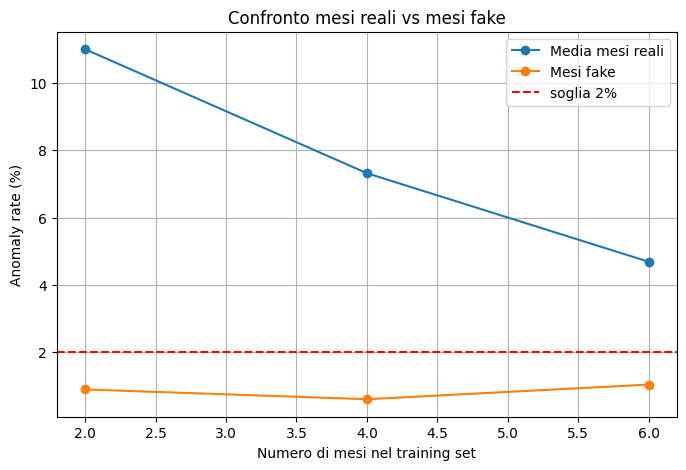

In [ ]:
real_results_df = pd.concat([results_df_2m, results_df_4m, results_df_6m])
real_mean = real_results_df.groupby("window_size")["anomaly rate"].mean().reset_index()

fake_results_df = pd.concat([results_df_2m_fake, results_df_4m_fake, results_df_6m_fake])
plt.figure(figsize=(8,5))
plt.plot(real_mean["window_size"], real_mean["anomaly rate"]*100, "o-", label="Media mesi reali")
plt.plot(fake_results_df["window_size"], fake_results_df["anomaly"]*100, "o-", label="Mesi fake")
plt.axhline(2, color="r", linestyle="--", label="soglia 2%")
plt.xlabel("Numero di mesi nel training set")
plt.ylabel("Anomaly rate (%)")
plt.title("Confronto mesi reali vs mesi fake")
plt.legend()
plt.grid(True)

plt.show()

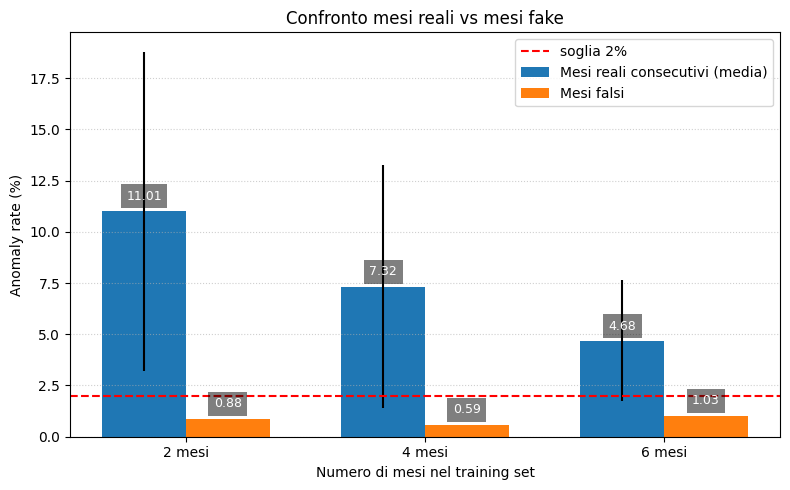

In [ ]:
labels = ["2 mesi", "4 mesi", "6 mesi"]
real_results_df = pd.concat([results_df_2m, results_df_4m, results_df_6m])
# salvataggio dei risultati
# real_results_df.to_csv("/content/drive/MyDrive/IF_real.csv", index=False)
real_mean = real_results_df.groupby("window_size")["anomaly rate"].mean().reset_index()
real_std = real_results_df.groupby("window_size")["anomaly rate"].std().reset_index()

fake_results_df = pd.concat([results_df_2m_fake, results_df_4m_fake, results_df_6m_fake])
#salvataggio risultati
# fake_results_df.to_csv("/content/drive/MyDrive/IF_fake.csv", index=False)

x = np.arange(len(labels))
w = 0.35

fig, ax = plt.subplots(figsize=(8, 5))
bars1 = ax.bar(x - w/2, real_mean["anomaly rate"]*100, w, yerr= real_std["anomaly rate"]*100, label="Mesi reali consecutivi (media)")
bars2 = ax.bar(x + w/2, fake_results_df["anomaly"]*100, w, label="Mesi falsi")
ax.axhline(2, color="r", linestyle="--", label="soglia 2%")
ax.set_xlabel("Numero di mesi nel training set")
ax.set_ylabel("Anomaly rate (%)")
ax.set_title("Confronto mesi reali vs mesi fake")

ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
ax.grid(axis="y", linestyle=":", alpha=0.6)

def add_labels(bars):
  for bar in bars:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width()/2,
        height + 0.4,
        f"{height:.2f}",
        ha="center",
        va="bottom",
        fontsize=9,
        color="white",
        bbox = dict(facecolor="black", alpha=0.5, edgecolor="none")
    )

add_labels(bars1)
add_labels(bars2)
plt.tight_layout()
plt.show()

# Finestre temporali con temperatura

In [4]:
df_temp = pd.read_csv("/content/data_temperature.csv", encoding = "utf-8")
df_temp["timestamp"] = pd.to_datetime(df_temp["timestamp"])
df_temp["timestamp"] = df_temp["timestamp"].dt.tz_localize(None)
df_temp = df_temp.sort_values("timestamp")

end = "2025-01-01"
new_df = df_temp[(df_temp["timestamp"] < end)]

In [5]:
#parametri
features = ["Mode 1", "Mode 2", "Mode 3", "Mode 4", "Mode 5", "Mode 6", "temperatura"]
results = []
window_size = 2
n_months = 12
start_date = new_df["timestamp"].min()

for m in range(1, n_months - window_size + 2):
  train_start = start_date + pd.DateOffset(months=m-1)
  train_end = start_date + pd.DateOffset(months=m-1+window_size)
  train_df = new_df[(new_df["timestamp"] >= train_start) & (new_df["timestamp"] < train_end)]

  valid_df = new_df[~new_df["timestamp"].isin(train_df["timestamp"])]

  anomaly = anomaly_rate_IF(train_df, valid_df, features)

  train_months = sorted(train_df["timestamp"].dt.to_period("M").unique())

  results.append({"train_months": [str(x) for x in train_months] , "window_size": len(train_months), "anomaly rate": anomaly})

results_df_2m = pd.DataFrame(results)
print(results_df_2m)

          train_months  window_size  anomaly rate
0   [2024-01, 2024-02]            2      0.476306
1   [2024-02, 2024-03]            2      0.512034
2   [2024-03, 2024-04]            2      0.221146
3   [2024-04, 2024-05]            2      0.108626
4   [2024-05, 2024-06]            2      0.117496
5   [2024-06, 2024-07]            2      0.178173
6   [2024-07, 2024-08]            2      0.317020
7   [2024-08, 2024-09]            2      0.272472
8   [2024-09, 2024-10]            2      0.244945
9   [2024-10, 2024-11]            2      0.136695
10  [2024-11, 2024-12]            2      0.167289


In [6]:
#parametri
features = ["Mode 1", "Mode 2", "Mode 3", "Mode 4", "Mode 5", "Mode 6", "temperatura"]
results = []
window_size = 4
n_months = 12
start_date = new_df["timestamp"].min()

for m in range(1, n_months - window_size + 2):
  train_start = start_date + pd.DateOffset(months=m-1)
  train_end = start_date + pd.DateOffset(months=m-1+window_size)
  train_df = new_df[(new_df["timestamp"] >= train_start) & (new_df["timestamp"] < train_end)]

  valid_df = new_df[~new_df["timestamp"].isin(train_df["timestamp"])]

  anomaly = anomaly_rate_IF(train_df, valid_df, features)

  train_months = sorted(train_df["timestamp"].dt.to_period("M").unique())

  results.append({"train_months": [str(x) for x in train_months] , "window_size": len(train_months), "anomaly rate": anomaly})

results_df_4m = pd.DataFrame(results)
print(results_df_4m)

                           train_months  window_size  anomaly rate
0  [2024-01, 2024-02, 2024-03, 2024-04]            4      0.350404
1  [2024-02, 2024-03, 2024-04, 2024-05]            4      0.168511
2  [2024-03, 2024-04, 2024-05, 2024-06]            4      0.090750
3  [2024-04, 2024-05, 2024-06, 2024-07]            4      0.063371
4  [2024-05, 2024-06, 2024-07, 2024-08]            4      0.147765
5  [2024-06, 2024-07, 2024-08, 2024-09]            4      0.246988
6  [2024-07, 2024-08, 2024-09, 2024-10]            4      0.222805
7  [2024-08, 2024-09, 2024-10, 2024-11]            4      0.106714
8  [2024-09, 2024-10, 2024-11, 2024-12]            4      0.048773


In [7]:
#parametri
features = ["Mode 1", "Mode 2", "Mode 3", "Mode 4", "Mode 5", "Mode 6", "temperatura"]
results = []
window_size = 6
n_months = 12
start_date = new_df["timestamp"].min()

for m in range(1, n_months - window_size + 2):
  train_start = start_date + pd.DateOffset(months=m-1)
  train_end = start_date + pd.DateOffset(months=m-1+window_size)
  train_df = new_df[(new_df["timestamp"] >= train_start) & (new_df["timestamp"] < train_end)]

  valid_df = new_df[~new_df["timestamp"].isin(train_df["timestamp"])]

  anomaly = anomaly_rate_IF(train_df, valid_df, features)

  train_months = sorted(train_df["timestamp"].dt.to_period("M").unique())

  results.append({"train_months": [str(x) for x in train_months] , "window_size": len(train_months), "anomaly rate": anomaly})

results_df_6m = pd.DataFrame(results)
print(results_df_6m)

                                        train_months  window_size  \
0  [2024-01, 2024-02, 2024-03, 2024-04, 2024-05, ...            6   
1  [2024-02, 2024-03, 2024-04, 2024-05, 2024-06, ...            6   
2  [2024-03, 2024-04, 2024-05, 2024-06, 2024-07, ...            6   
3  [2024-04, 2024-05, 2024-06, 2024-07, 2024-08, ...            6   
4  [2024-05, 2024-06, 2024-07, 2024-08, 2024-09, ...            6   
5  [2024-06, 2024-07, 2024-08, 2024-09, 2024-10, ...            6   
6  [2024-07, 2024-08, 2024-09, 2024-10, 2024-11, ...            6   

   anomaly rate  
0      0.138354  
1      0.057968  
2      0.021712  
3      0.093882  
4      0.303738  
5      0.137056  
6      0.021860  


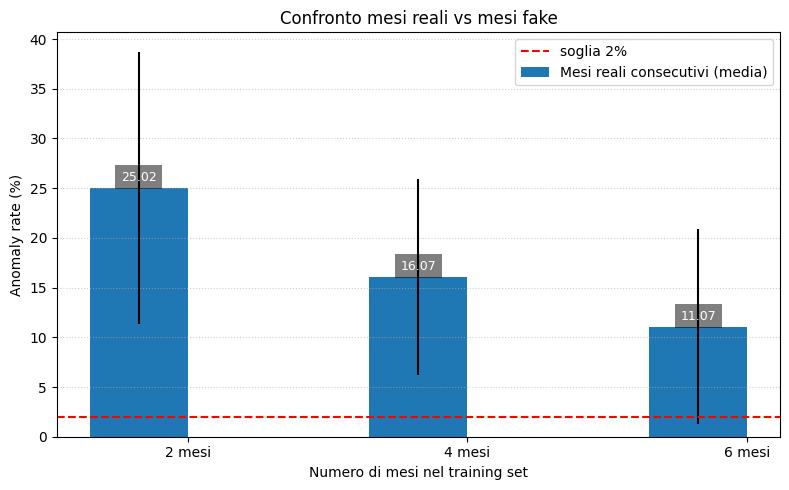

In [9]:
labels = ["2 mesi", "4 mesi", "6 mesi"]
real_results_df = pd.concat([results_df_2m, results_df_4m, results_df_6m])
# salvataggio dei risultati
real_results_df.to_csv("/content/drive/MyDrive/IF_real_T.csv", index=False)
real_mean = real_results_df.groupby("window_size")["anomaly rate"].mean().reset_index()
real_std = real_results_df.groupby("window_size")["anomaly rate"].std().reset_index()

# fake_results_df = pd.concat([results_df_2m_fake, results_df_4m_fake, results_df_6m_fake])
# #salvataggio risultati
# # fake_results_df.to_csv("/content/drive/MyDrive/IF_fake.csv", index=False)

x = np.arange(len(labels))
w = 0.35

fig, ax = plt.subplots(figsize=(8, 5))
bars1 = ax.bar(x - w/2, real_mean["anomaly rate"]*100, w, yerr= real_std["anomaly rate"]*100, label="Mesi reali consecutivi (media)")
# bars2 = ax.bar(x + w/2, fake_results_df["anomaly"]*100, w, label="Mesi falsi")
ax.axhline(2, color="r", linestyle="--", label="soglia 2%")
ax.set_xlabel("Numero di mesi nel training set")
ax.set_ylabel("Anomaly rate (%)")
ax.set_title("Confronto mesi reali vs mesi fake")

ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
ax.grid(axis="y", linestyle=":", alpha=0.6)

def add_labels(bars):
  for bar in bars:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width()/2,
        height + 0.4,
        f"{height:.2f}",
        ha="center",
        va="bottom",
        fontsize=9,
        color="white",
        bbox = dict(facecolor="black", alpha=0.5, edgecolor="none")
    )

add_labels(bars1)
# add_labels(bars2)
plt.tight_layout()
plt.show()

# Dataset con anomalie

In [ ]:
url_anomaly = "https://drive.google.com/uc?id=1onDmjfJio6nVRaaQSOgd6wW_XyuyyCra"
output_anomaly = "data_anomaly.csv"
gdown.download(url_anomaly, output_anomaly)

df_anomaly = pd.read_csv("/content/data_anomaly.csv", encoding = "utf-8")

mapping = {
    "F1": "Mode 1",
    "F2": "Mode 2",
    "F3": "Mode 3",
    "F4": "Mode 4",
    "F5": "Mode 5",
    "F6": "Mode 6",
}

df_anomaly = df_anomaly.rename(columns=mapping)

Downloading...
From: https://drive.google.com/uc?id=1onDmjfJio6nVRaaQSOgd6wW_XyuyyCra
To: /content/data_anomaly.csv
100%|██████████| 990k/990k [00:00<00:00, 41.3MB/s]


Scenario di danno DS1, 2 mesi di dati

In [ ]:
df_DS1_20 = df_anomaly[(df_anomaly["Damage Scenario"] == "DS1") & (df_anomaly["Damage Size"] == 20)]

df_original = pd.read_csv("/content/data_no_temperature.csv", encoding = "utf-8")
df_original["timestamp"] = pd.to_datetime(df_original["timestamp"])
df_original["timestamp"] = df_original["timestamp"].dt.tz_localize(None)
df_original = df_original.sort_values("timestamp")

end = "2025-01-01"
df = df_original[(df_original["timestamp"] < end)]


def anomaly_rate_IF(train_df, valid_df, features):
  scaler = StandardScaler()
  X_train = scaler.fit_transform(train_df[features])
  X_val = scaler.transform(valid_df[features])

  iso = IsolationForest(
      contamination=0.01,
      random_state=42,
      n_estimators = 200
  )
  iso.fit(X_train)

  preds = iso.predict(X_val)
  anomaly_rate = np.mean(preds == -1)
  return anomaly_rate



#parametri
features = ["Mode 1", "Mode 2", "Mode 3", "Mode 4", "Mode 5", "Mode 6"]
results = []
window_size = 2
n_months = 12
start_date = df["timestamp"].min()

for m in range(1, n_months - window_size + 2):
  train_start = start_date + pd.DateOffset(months=m-1)
  train_end = start_date + pd.DateOffset(months=m-1+window_size)
  train_df = df[(df["timestamp"] >= train_start) & (df["timestamp"] < train_end)]

  anomaly = anomaly_rate_IF(train_df, df_DS1_20, features)

  train_months = sorted(train_df["timestamp"].dt.to_period("M").unique())

  results.append({"train_months": [str(x) for x in train_months], "window_size": len(train_months), "damage size":20, "anomaly rate": anomaly})

results_df_2m_anomaly_DS1_20 = pd.DataFrame(results)
print("\n", results_df_2m_anomaly_DS1_20)





df_DS1_40 = df_anomaly[(df_anomaly["Damage Scenario"] == "DS1") & (df_anomaly["Damage Size"] == 40)]

df_original = pd.read_csv("/content/data_no_temperature.csv", encoding = "utf-8")
df_original["timestamp"] = pd.to_datetime(df_original["timestamp"])
df_original["timestamp"] = df_original["timestamp"].dt.tz_localize(None)
df_original = df_original.sort_values("timestamp")

end = "2025-01-01"
df = df_original[(df_original["timestamp"] < end)]


def anomaly_rate_IF(train_df, valid_df, features):
  scaler = StandardScaler()
  X_train = scaler.fit_transform(train_df[features])
  X_val = scaler.transform(valid_df[features])

  iso = IsolationForest(
      contamination=0.01,
      random_state=42,
      n_estimators = 200
  )
  iso.fit(X_train)

  preds = iso.predict(X_val)
  anomaly_rate = np.mean(preds == -1)
  return anomaly_rate



#parametri
features = ["Mode 1", "Mode 2", "Mode 3", "Mode 4", "Mode 5", "Mode 6"]
results = []
window_size = 2
n_months = 12
start_date = df["timestamp"].min()

for m in range(1, n_months - window_size + 2):
  train_start = start_date + pd.DateOffset(months=m-1)
  train_end = start_date + pd.DateOffset(months=m-1+window_size)
  train_df = df[(df["timestamp"] >= train_start) & (df["timestamp"] < train_end)]

  anomaly = anomaly_rate_IF(train_df, df_DS1_40, features)

  train_months = sorted(train_df["timestamp"].dt.to_period("M").unique())

  results.append({"train_months": [str(x) for x in train_months], "window_size": len(train_months), "damage size":40, "anomaly rate": anomaly})

results_df_2m_anomaly_DS1_40 = pd.DataFrame(results)
print("\n", results_df_2m_anomaly_DS1_40)






df_DS1_60 = df_anomaly[(df_anomaly["Damage Scenario"] == "DS1") & (df_anomaly["Damage Size"] == 60)]

df_original = pd.read_csv("/content/data_no_temperature.csv", encoding = "utf-8")
df_original["timestamp"] = pd.to_datetime(df_original["timestamp"])
df_original["timestamp"] = df_original["timestamp"].dt.tz_localize(None)
df_original = df_original.sort_values("timestamp")

end = "2025-01-01"
df = df_original[(df_original["timestamp"] < end)]


def anomaly_rate_IF(train_df, valid_df, features):
  scaler = StandardScaler()
  X_train = scaler.fit_transform(train_df[features])
  X_val = scaler.transform(valid_df[features])

  iso = IsolationForest(
      contamination=0.01,
      random_state=42,
      n_estimators = 200
  )
  iso.fit(X_train)

  preds = iso.predict(X_val)
  anomaly_rate = np.mean(preds == -1)
  return anomaly_rate



#parametri
features = ["Mode 1", "Mode 2", "Mode 3", "Mode 4", "Mode 5", "Mode 6"]
results = []
window_size = 2
n_months = 12
start_date = df["timestamp"].min()

for m in range(1, n_months - window_size + 2):
  train_start = start_date + pd.DateOffset(months=m-1)
  train_end = start_date + pd.DateOffset(months=m-1+window_size)
  train_df = df[(df["timestamp"] >= train_start) & (df["timestamp"] < train_end)]

  anomaly = anomaly_rate_IF(train_df, df_DS1_60, features)

  train_months = sorted(train_df["timestamp"].dt.to_period("M").unique())

  results.append({"train_months": [str(x) for x in train_months], "window_size": len(train_months), "damage size":60, "anomaly rate": anomaly})

results_df_2m_anomaly_DS1_60 = pd.DataFrame(results)
print("\n", results_df_2m_anomaly_DS1_60)









df_DS1_80 = df_anomaly[(df_anomaly["Damage Scenario"] == "DS1") & (df_anomaly["Damage Size"] == 80)]

df_original = pd.read_csv("/content/data_no_temperature.csv", encoding = "utf-8")
df_original["timestamp"] = pd.to_datetime(df_original["timestamp"])
df_original["timestamp"] = df_original["timestamp"].dt.tz_localize(None)
df_original = df_original.sort_values("timestamp")

end = "2025-01-01"
df = df_original[(df_original["timestamp"] < end)]


def anomaly_rate_IF(train_df, valid_df, features):
  scaler = StandardScaler()
  X_train = scaler.fit_transform(train_df[features])
  X_val = scaler.transform(valid_df[features])

  iso = IsolationForest(
      contamination=0.01,
      random_state=42,
      n_estimators = 200
  )
  iso.fit(X_train)

  preds = iso.predict(X_val)
  anomaly_rate = np.mean(preds == -1)
  return anomaly_rate



#parametri
features = ["Mode 1", "Mode 2", "Mode 3", "Mode 4", "Mode 5", "Mode 6"]
results = []
window_size = 2
n_months = 12
start_date = df["timestamp"].min()

for m in range(1, n_months - window_size + 2):
  train_start = start_date + pd.DateOffset(months=m-1)
  train_end = start_date + pd.DateOffset(months=m-1+window_size)
  train_df = df[(df["timestamp"] >= train_start) & (df["timestamp"] < train_end)]

  anomaly = anomaly_rate_IF(train_df, df_DS1_80, features)

  train_months = sorted(train_df["timestamp"].dt.to_period("M").unique())

  results.append({"train_months": [str(x) for x in train_months], "window_size": len(train_months), "damage size":80, "anomaly rate": anomaly})

results_df_2m_anomaly_DS1_80 = pd.DataFrame(results)
print("\n", results_df_2m_anomaly_DS1_80)







df_DS1_100 = df_anomaly[(df_anomaly["Damage Scenario"] == "DS1") & (df_anomaly["Damage Size"] == 100)]

df_original = pd.read_csv("/content/data_no_temperature.csv", encoding = "utf-8")
df_original["timestamp"] = pd.to_datetime(df_original["timestamp"])
df_original["timestamp"] = df_original["timestamp"].dt.tz_localize(None)
df_original = df_original.sort_values("timestamp")

end = "2025-01-01"
df = df_original[(df_original["timestamp"] < end)]


def anomaly_rate_IF(train_df, valid_df, features):
  scaler = StandardScaler()
  X_train = scaler.fit_transform(train_df[features])
  X_val = scaler.transform(valid_df[features])

  iso = IsolationForest(
      contamination=0.01,
      random_state=42,
      n_estimators = 200
  )
  iso.fit(X_train)

  preds = iso.predict(X_val)
  anomaly_rate = np.mean(preds == -1)
  return anomaly_rate



#parametri
features = ["Mode 1", "Mode 2", "Mode 3", "Mode 4", "Mode 5", "Mode 6"]
results = []
window_size = 2
n_months = 12
start_date = df["timestamp"].min()

for m in range(1, n_months - window_size + 2):
  train_start = start_date + pd.DateOffset(months=m-1)
  train_end = start_date + pd.DateOffset(months=m-1+window_size)
  train_df = df[(df["timestamp"] >= train_start) & (df["timestamp"] < train_end)]

  anomaly = anomaly_rate_IF(train_df, df_DS1_100, features)

  train_months = sorted(train_df["timestamp"].dt.to_period("M").unique())

  results.append({"train_months": [str(x) for x in train_months], "window_size": len(train_months), "damage size":100, "anomaly rate": anomaly})

results_df_2m_anomaly_DS1_100 = pd.DataFrame(results)
print("\n", results_df_2m_anomaly_DS1_100)


           train_months  window_size  damage size  anomaly rate
0   [2024-01, 2024-02]            2           20           1.0
1   [2024-02, 2024-03]            2           20           1.0
2   [2024-03, 2024-04]            2           20           1.0
3   [2024-04, 2024-05]            2           20           1.0
4   [2024-05, 2024-06]            2           20           1.0
5   [2024-06, 2024-07]            2           20           1.0
6   [2024-07, 2024-08]            2           20           1.0
7   [2024-08, 2024-09]            2           20           1.0
8   [2024-09, 2024-10]            2           20           1.0
9   [2024-10, 2024-11]            2           20           1.0
10  [2024-11, 2024-12]            2           20           1.0

           train_months  window_size  damage size  anomaly rate
0   [2024-01, 2024-02]            2           40           1.0
1   [2024-02, 2024-03]            2           40           1.0
2   [2024-03, 2024-04]            2           40   

Scenario di danno DS1, 4 mesi di dati

In [ ]:
df_DS1_20 = df_anomaly[(df_anomaly["Damage Scenario"] == "DS1") & (df_anomaly["Damage Size"] == 20)]

df_original = pd.read_csv("/content/data_no_temperature.csv", encoding = "utf-8")
df_original["timestamp"] = pd.to_datetime(df_original["timestamp"])
df_original["timestamp"] = df_original["timestamp"].dt.tz_localize(None)
df_original = df_original.sort_values("timestamp")

end = "2025-01-01"
df = df_original[(df_original["timestamp"] < end)]


def anomaly_rate_IF(train_df, valid_df, features):
  scaler = StandardScaler()
  X_train = scaler.fit_transform(train_df[features])
  X_val = scaler.transform(valid_df[features])

  iso = IsolationForest(
      contamination=0.01,
      random_state=42,
      n_estimators = 200
  )
  iso.fit(X_train)

  preds = iso.predict(X_val)
  anomaly_rate = np.mean(preds == -1)
  return anomaly_rate



#parametri
features = ["Mode 1", "Mode 2", "Mode 3", "Mode 4", "Mode 5", "Mode 6"]
results = []
window_size = 4
n_months = 12
start_date = df["timestamp"].min()

for m in range(1, n_months - window_size + 2):
  train_start = start_date + pd.DateOffset(months=m-1)
  train_end = start_date + pd.DateOffset(months=m-1+window_size)
  train_df = df[(df["timestamp"] >= train_start) & (df["timestamp"] < train_end)]

  anomaly = anomaly_rate_IF(train_df, df_DS1_20, features)

  train_months = sorted(train_df["timestamp"].dt.to_period("M").unique())

  results.append({"train_months": [str(x) for x in train_months], "window_size": len(train_months), "damage size":20, "anomaly rate": anomaly})

results_df_4m_anomaly_DS1_20 = pd.DataFrame(results)
print("\n", results_df_4m_anomaly_DS1_20)





df_DS1_40 = df_anomaly[(df_anomaly["Damage Scenario"] == "DS1") & (df_anomaly["Damage Size"] == 40)]

df_original = pd.read_csv("/content/data_no_temperature.csv", encoding = "utf-8")
df_original["timestamp"] = pd.to_datetime(df_original["timestamp"])
df_original["timestamp"] = df_original["timestamp"].dt.tz_localize(None)
df_original = df_original.sort_values("timestamp")

end = "2025-01-01"
df = df_original[(df_original["timestamp"] < end)]


def anomaly_rate_IF(train_df, valid_df, features):
  scaler = StandardScaler()
  X_train = scaler.fit_transform(train_df[features])
  X_val = scaler.transform(valid_df[features])

  iso = IsolationForest(
      contamination=0.01,
      random_state=42,
      n_estimators = 200
  )
  iso.fit(X_train)

  preds = iso.predict(X_val)
  anomaly_rate = np.mean(preds == -1)
  return anomaly_rate



#parametri
features = ["Mode 1", "Mode 2", "Mode 3", "Mode 4", "Mode 5", "Mode 6"]
results = []
window_size = 4
n_months = 12
start_date = df["timestamp"].min()

for m in range(1, n_months - window_size + 2):
  train_start = start_date + pd.DateOffset(months=m-1)
  train_end = start_date + pd.DateOffset(months=m-1+window_size)
  train_df = df[(df["timestamp"] >= train_start) & (df["timestamp"] < train_end)]

  anomaly = anomaly_rate_IF(train_df, df_DS1_40, features)

  train_months = sorted(train_df["timestamp"].dt.to_period("M").unique())

  results.append({"train_months": [str(x) for x in train_months], "window_size": len(train_months), "damage size":40, "anomaly rate": anomaly})

results_df_4m_anomaly_DS1_40 = pd.DataFrame(results)
print("\n", results_df_4m_anomaly_DS1_40)






df_DS1_60 = df_anomaly[(df_anomaly["Damage Scenario"] == "DS1") & (df_anomaly["Damage Size"] == 60)]

df_original = pd.read_csv("/content/data_no_temperature.csv", encoding = "utf-8")
df_original["timestamp"] = pd.to_datetime(df_original["timestamp"])
df_original["timestamp"] = df_original["timestamp"].dt.tz_localize(None)
df_original = df_original.sort_values("timestamp")

end = "2025-01-01"
df = df_original[(df_original["timestamp"] < end)]


def anomaly_rate_IF(train_df, valid_df, features):
  scaler = StandardScaler()
  X_train = scaler.fit_transform(train_df[features])
  X_val = scaler.transform(valid_df[features])

  iso = IsolationForest(
      contamination=0.01,
      random_state=42,
      n_estimators = 200
  )
  iso.fit(X_train)

  preds = iso.predict(X_val)
  anomaly_rate = np.mean(preds == -1)
  return anomaly_rate



#parametri
features = ["Mode 1", "Mode 2", "Mode 3", "Mode 4", "Mode 5", "Mode 6"]
results = []
window_size = 4
n_months = 12
start_date = df["timestamp"].min()

for m in range(1, n_months - window_size + 2):
  train_start = start_date + pd.DateOffset(months=m-1)
  train_end = start_date + pd.DateOffset(months=m-1+window_size)
  train_df = df[(df["timestamp"] >= train_start) & (df["timestamp"] < train_end)]

  anomaly = anomaly_rate_IF(train_df, df_DS1_60, features)

  train_months = sorted(train_df["timestamp"].dt.to_period("M").unique())

  results.append({"train_months": [str(x) for x in train_months], "window_size": len(train_months), "damage size":60, "anomaly rate": anomaly})

results_df_4m_anomaly_DS1_60 = pd.DataFrame(results)
print("\n", results_df_4m_anomaly_DS1_60)









df_DS1_80 = df_anomaly[(df_anomaly["Damage Scenario"] == "DS1") & (df_anomaly["Damage Size"] == 80)]

df_original = pd.read_csv("/content/data_no_temperature.csv", encoding = "utf-8")
df_original["timestamp"] = pd.to_datetime(df_original["timestamp"])
df_original["timestamp"] = df_original["timestamp"].dt.tz_localize(None)
df_original = df_original.sort_values("timestamp")

end = "2025-01-01"
df = df_original[(df_original["timestamp"] < end)]


def anomaly_rate_IF(train_df, valid_df, features):
  scaler = StandardScaler()
  X_train = scaler.fit_transform(train_df[features])
  X_val = scaler.transform(valid_df[features])

  iso = IsolationForest(
      contamination=0.01,
      random_state=42,
      n_estimators = 200
  )
  iso.fit(X_train)

  preds = iso.predict(X_val)
  anomaly_rate = np.mean(preds == -1)
  return anomaly_rate



#parametri
features = ["Mode 1", "Mode 2", "Mode 3", "Mode 4", "Mode 5", "Mode 6"]
results = []
window_size = 4
n_months = 12
start_date = df["timestamp"].min()

for m in range(1, n_months - window_size + 2):
  train_start = start_date + pd.DateOffset(months=m-1)
  train_end = start_date + pd.DateOffset(months=m-1+window_size)
  train_df = df[(df["timestamp"] >= train_start) & (df["timestamp"] < train_end)]

  anomaly = anomaly_rate_IF(train_df, df_DS1_80, features)

  train_months = sorted(train_df["timestamp"].dt.to_period("M").unique())

  results.append({"train_months": [str(x) for x in train_months], "window_size": len(train_months), "damage size":80, "anomaly rate": anomaly})

results_df_4m_anomaly_DS1_80 = pd.DataFrame(results)
print("\n", results_df_4m_anomaly_DS1_80)







df_DS1_100 = df_anomaly[(df_anomaly["Damage Scenario"] == "DS1") & (df_anomaly["Damage Size"] == 100)]

df_original = pd.read_csv("/content/data_no_temperature.csv", encoding = "utf-8")
df_original["timestamp"] = pd.to_datetime(df_original["timestamp"])
df_original["timestamp"] = df_original["timestamp"].dt.tz_localize(None)
df_original = df_original.sort_values("timestamp")

end = "2025-01-01"
df = df_original[(df_original["timestamp"] < end)]


def anomaly_rate_IF(train_df, valid_df, features):
  scaler = StandardScaler()
  X_train = scaler.fit_transform(train_df[features])
  X_val = scaler.transform(valid_df[features])

  iso = IsolationForest(
      contamination=0.01,
      random_state=42,
      n_estimators = 200
  )
  iso.fit(X_train)

  preds = iso.predict(X_val)
  anomaly_rate = np.mean(preds == -1)
  return anomaly_rate



#parametri
features = ["Mode 1", "Mode 2", "Mode 3", "Mode 4", "Mode 5", "Mode 6"]
results = []
window_size = 4
n_months = 12
start_date = df["timestamp"].min()

for m in range(1, n_months - window_size + 2):
  train_start = start_date + pd.DateOffset(months=m-1)
  train_end = start_date + pd.DateOffset(months=m-1+window_size)
  train_df = df[(df["timestamp"] >= train_start) & (df["timestamp"] < train_end)]

  anomaly = anomaly_rate_IF(train_df, df_DS1_100, features)

  train_months = sorted(train_df["timestamp"].dt.to_period("M").unique())

  results.append({"train_months": [str(x) for x in train_months], "window_size": len(train_months), "damage size":100, "anomaly rate": anomaly})

results_df_4m_anomaly_DS1_100 = pd.DataFrame(results)
print("\n", results_df_4m_anomaly_DS1_100)


                            train_months  window_size  damage size  \
0  [2024-01, 2024-02, 2024-03, 2024-04]            4           20   
1  [2024-02, 2024-03, 2024-04, 2024-05]            4           20   
2  [2024-03, 2024-04, 2024-05, 2024-06]            4           20   
3  [2024-04, 2024-05, 2024-06, 2024-07]            4           20   
4  [2024-05, 2024-06, 2024-07, 2024-08]            4           20   
5  [2024-06, 2024-07, 2024-08, 2024-09]            4           20   
6  [2024-07, 2024-08, 2024-09, 2024-10]            4           20   
7  [2024-08, 2024-09, 2024-10, 2024-11]            4           20   
8  [2024-09, 2024-10, 2024-11, 2024-12]            4           20   

   anomaly rate  
0           1.0  
1           1.0  
2           1.0  
3           1.0  
4           1.0  
5           1.0  
6           1.0  
7           1.0  
8           1.0  

                            train_months  window_size  damage size  \
0  [2024-01, 2024-02, 2024-03, 2024-04]            4    

Scenario di danno DS1, 6 mesi di dati

In [ ]:
df_DS1_20 = df_anomaly[(df_anomaly["Damage Scenario"] == "DS1") & (df_anomaly["Damage Size"] == 20)]

df_original = pd.read_csv("/content/data_no_temperature.csv", encoding = "utf-8")
df_original["timestamp"] = pd.to_datetime(df_original["timestamp"])
df_original["timestamp"] = df_original["timestamp"].dt.tz_localize(None)
df_original = df_original.sort_values("timestamp")

end = "2025-01-01"
df = df_original[(df_original["timestamp"] < end)]


def anomaly_rate_IF(train_df, valid_df, features):
  scaler = StandardScaler()
  X_train = scaler.fit_transform(train_df[features])
  X_val = scaler.transform(valid_df[features])

  iso = IsolationForest(
      contamination=0.01,
      random_state=42,
      n_estimators = 200
  )
  iso.fit(X_train)

  preds = iso.predict(X_val)
  anomaly_rate = np.mean(preds == -1)
  return anomaly_rate



#parametri
features = ["Mode 1", "Mode 2", "Mode 3", "Mode 4", "Mode 5", "Mode 6"]
results = []
window_size = 6
n_months = 12
start_date = df["timestamp"].min()

for m in range(1, n_months - window_size + 2):
  train_start = start_date + pd.DateOffset(months=m-1)
  train_end = start_date + pd.DateOffset(months=m-1+window_size)
  train_df = df[(df["timestamp"] >= train_start) & (df["timestamp"] < train_end)]

  anomaly = anomaly_rate_IF(train_df, df_DS1_20, features)

  train_months = sorted(train_df["timestamp"].dt.to_period("M").unique())

  results.append({"train_months": [str(x) for x in train_months], "window_size": len(train_months), "damage size":20, "anomaly rate": anomaly})

results_df_6m_anomaly_DS1_20 = pd.DataFrame(results)
print("\n", results_df_6m_anomaly_DS1_20)





df_DS1_40 = df_anomaly[(df_anomaly["Damage Scenario"] == "DS1") & (df_anomaly["Damage Size"] == 40)]

df_original = pd.read_csv("/content/data_no_temperature.csv", encoding = "utf-8")
df_original["timestamp"] = pd.to_datetime(df_original["timestamp"])
df_original["timestamp"] = df_original["timestamp"].dt.tz_localize(None)
df_original = df_original.sort_values("timestamp")

end = "2025-01-01"
df = df_original[(df_original["timestamp"] < end)]


def anomaly_rate_IF(train_df, valid_df, features):
  scaler = StandardScaler()
  X_train = scaler.fit_transform(train_df[features])
  X_val = scaler.transform(valid_df[features])

  iso = IsolationForest(
      contamination=0.01,
      random_state=42,
      n_estimators = 200
  )
  iso.fit(X_train)

  preds = iso.predict(X_val)
  anomaly_rate = np.mean(preds == -1)
  return anomaly_rate



#parametri
features = ["Mode 1", "Mode 2", "Mode 3", "Mode 4", "Mode 5", "Mode 6"]
results = []
window_size = 6
n_months = 12
start_date = df["timestamp"].min()

for m in range(1, n_months - window_size + 2):
  train_start = start_date + pd.DateOffset(months=m-1)
  train_end = start_date + pd.DateOffset(months=m-1+window_size)
  train_df = df[(df["timestamp"] >= train_start) & (df["timestamp"] < train_end)]

  anomaly = anomaly_rate_IF(train_df, df_DS1_40, features)

  train_months = sorted(train_df["timestamp"].dt.to_period("M").unique())

  results.append({"train_months": [str(x) for x in train_months], "window_size": len(train_months), "damage size":40, "anomaly rate": anomaly})

results_df_6m_anomaly_DS1_40 = pd.DataFrame(results)
print("\n", results_df_6m_anomaly_DS1_40)






df_DS1_60 = df_anomaly[(df_anomaly["Damage Scenario"] == "DS1") & (df_anomaly["Damage Size"] == 60)]

df_original = pd.read_csv("/content/data_no_temperature.csv", encoding = "utf-8")
df_original["timestamp"] = pd.to_datetime(df_original["timestamp"])
df_original["timestamp"] = df_original["timestamp"].dt.tz_localize(None)
df_original = df_original.sort_values("timestamp")

end = "2025-01-01"
df = df_original[(df_original["timestamp"] < end)]


def anomaly_rate_IF(train_df, valid_df, features):
  scaler = StandardScaler()
  X_train = scaler.fit_transform(train_df[features])
  X_val = scaler.transform(valid_df[features])

  iso = IsolationForest(
      contamination=0.01,
      random_state=42,
      n_estimators = 200
  )
  iso.fit(X_train)

  preds = iso.predict(X_val)
  anomaly_rate = np.mean(preds == -1)
  return anomaly_rate



#parametri
features = ["Mode 1", "Mode 2", "Mode 3", "Mode 4", "Mode 5", "Mode 6"]
results = []
window_size = 6
n_months = 12
start_date = df["timestamp"].min()

for m in range(1, n_months - window_size + 2):
  train_start = start_date + pd.DateOffset(months=m-1)
  train_end = start_date + pd.DateOffset(months=m-1+window_size)
  train_df = df[(df["timestamp"] >= train_start) & (df["timestamp"] < train_end)]

  anomaly = anomaly_rate_IF(train_df, df_DS1_60, features)

  train_months = sorted(train_df["timestamp"].dt.to_period("M").unique())

  results.append({"train_months": [str(x) for x in train_months], "window_size": len(train_months), "damage size":60, "anomaly rate": anomaly})

results_df_6m_anomaly_DS1_60 = pd.DataFrame(results)
print("\n", results_df_6m_anomaly_DS1_60)









df_DS1_80 = df_anomaly[(df_anomaly["Damage Scenario"] == "DS1") & (df_anomaly["Damage Size"] == 80)]

df_original = pd.read_csv("/content/data_no_temperature.csv", encoding = "utf-8")
df_original["timestamp"] = pd.to_datetime(df_original["timestamp"])
df_original["timestamp"] = df_original["timestamp"].dt.tz_localize(None)
df_original = df_original.sort_values("timestamp")

end = "2025-01-01"
df = df_original[(df_original["timestamp"] < end)]


def anomaly_rate_IF(train_df, valid_df, features):
  scaler = StandardScaler()
  X_train = scaler.fit_transform(train_df[features])
  X_val = scaler.transform(valid_df[features])

  iso = IsolationForest(
      contamination=0.01,
      random_state=42,
      n_estimators = 200
  )
  iso.fit(X_train)

  preds = iso.predict(X_val)
  anomaly_rate = np.mean(preds == -1)
  return anomaly_rate



#parametri
features = ["Mode 1", "Mode 2", "Mode 3", "Mode 4", "Mode 5", "Mode 6"]
results = []
window_size = 6
n_months = 12
start_date = df["timestamp"].min()

for m in range(1, n_months - window_size + 2):
  train_start = start_date + pd.DateOffset(months=m-1)
  train_end = start_date + pd.DateOffset(months=m-1+window_size)
  train_df = df[(df["timestamp"] >= train_start) & (df["timestamp"] < train_end)]

  anomaly = anomaly_rate_IF(train_df, df_DS1_80, features)

  train_months = sorted(train_df["timestamp"].dt.to_period("M").unique())

  results.append({"train_months": [str(x) for x in train_months], "window_size": len(train_months), "damage size":80, "anomaly rate": anomaly})

results_df_6m_anomaly_DS1_80 = pd.DataFrame(results)
print("\n", results_df_6m_anomaly_DS1_80)







df_DS1_100 = df_anomaly[(df_anomaly["Damage Scenario"] == "DS1") & (df_anomaly["Damage Size"] == 100)]

df_original = pd.read_csv("/content/data_no_temperature.csv", encoding = "utf-8")
df_original["timestamp"] = pd.to_datetime(df_original["timestamp"])
df_original["timestamp"] = df_original["timestamp"].dt.tz_localize(None)
df_original = df_original.sort_values("timestamp")

end = "2025-01-01"
df = df_original[(df_original["timestamp"] < end)]


def anomaly_rate_IF(train_df, valid_df, features):
  scaler = StandardScaler()
  X_train = scaler.fit_transform(train_df[features])
  X_val = scaler.transform(valid_df[features])

  iso = IsolationForest(
      contamination=0.01,
      random_state=42,
      n_estimators = 200
  )
  iso.fit(X_train)

  preds = iso.predict(X_val)
  anomaly_rate = np.mean(preds == -1)
  return anomaly_rate



#parametri
features = ["Mode 1", "Mode 2", "Mode 3", "Mode 4", "Mode 5", "Mode 6"]
results = []
window_size = 6
n_months = 12
start_date = df["timestamp"].min()

for m in range(1, n_months - window_size + 2):
  train_start = start_date + pd.DateOffset(months=m-1)
  train_end = start_date + pd.DateOffset(months=m-1+window_size)
  train_df = df[(df["timestamp"] >= train_start) & (df["timestamp"] < train_end)]

  anomaly = anomaly_rate_IF(train_df, df_DS1_100, features)

  train_months = sorted(train_df["timestamp"].dt.to_period("M").unique())

  results.append({"train_months": [str(x) for x in train_months], "window_size": len(train_months), "damage size":100, "anomaly rate": anomaly})

results_df_6m_anomaly_DS1_100 = pd.DataFrame(results)
print("\n", results_df_6m_anomaly_DS1_100)


                                         train_months  window_size  \
0  [2024-01, 2024-02, 2024-03, 2024-04, 2024-05, ...            6   
1  [2024-02, 2024-03, 2024-04, 2024-05, 2024-06, ...            6   
2  [2024-03, 2024-04, 2024-05, 2024-06, 2024-07, ...            6   
3  [2024-04, 2024-05, 2024-06, 2024-07, 2024-08, ...            6   
4  [2024-05, 2024-06, 2024-07, 2024-08, 2024-09, ...            6   
5  [2024-06, 2024-07, 2024-08, 2024-09, 2024-10, ...            6   
6  [2024-07, 2024-08, 2024-09, 2024-10, 2024-11, ...            6   

   damage size  anomaly rate  
0           20           1.0  
1           20           1.0  
2           20           1.0  
3           20           1.0  
4           20           1.0  
5           20           1.0  
6           20           1.0  

                                         train_months  window_size  \
0  [2024-01, 2024-02, 2024-03, 2024-04, 2024-05, ...            6   
1  [2024-02, 2024-03, 2024-04, 2024-05, 2024-06, ...     

Scenario di danno DS2, 2 mesi di dati

In [ ]:
df_DS2_20 = df_anomaly[(df_anomaly["Damage Scenario"] == "DS2") & (df_anomaly["Damage Size"] == 20)]

df_original = pd.read_csv("/content/data_no_temperature.csv", encoding = "utf-8")
df_original["timestamp"] = pd.to_datetime(df_original["timestamp"])
df_original["timestamp"] = df_original["timestamp"].dt.tz_localize(None)
df_original = df_original.sort_values("timestamp")

end = "2025-01-01"
df = df_original[(df_original["timestamp"] < end)]


def anomaly_rate_IF(train_df, valid_df, features):
  scaler = StandardScaler()
  X_train = scaler.fit_transform(train_df[features])
  X_val = scaler.transform(valid_df[features])

  iso = IsolationForest(
      contamination=0.01,
      random_state=42,
      n_estimators = 200
  )
  iso.fit(X_train)

  preds = iso.predict(X_val)
  anomaly_rate = np.mean(preds == -1)
  return anomaly_rate



#parametri
features = ["Mode 1", "Mode 2", "Mode 3", "Mode 4", "Mode 5", "Mode 6"]
results = []
window_size = 2
n_months = 12
start_date = df["timestamp"].min()

for m in range(1, n_months - window_size + 2):
  train_start = start_date + pd.DateOffset(months=m-1)
  train_end = start_date + pd.DateOffset(months=m-1+window_size)
  train_df = df[(df["timestamp"] >= train_start) & (df["timestamp"] < train_end)]

  anomaly = anomaly_rate_IF(train_df, df_DS2_20, features)

  train_months = sorted(train_df["timestamp"].dt.to_period("M").unique())

  results.append({"train_months": [str(x) for x in train_months], "window_size": len(train_months), "damage size":20, "anomaly rate": anomaly})

results_df_2m_anomaly_DS2_20 = pd.DataFrame(results)
print("\n", results_df_2m_anomaly_DS2_20)





df_DS2_40 = df_anomaly[(df_anomaly["Damage Scenario"] == "DS2") & (df_anomaly["Damage Size"] == 40)]

df_original = pd.read_csv("/content/data_no_temperature.csv", encoding = "utf-8")
df_original["timestamp"] = pd.to_datetime(df_original["timestamp"])
df_original["timestamp"] = df_original["timestamp"].dt.tz_localize(None)
df_original = df_original.sort_values("timestamp")

end = "2025-01-01"
df = df_original[(df_original["timestamp"] < end)]


def anomaly_rate_IF(train_df, valid_df, features):
  scaler = StandardScaler()
  X_train = scaler.fit_transform(train_df[features])
  X_val = scaler.transform(valid_df[features])

  iso = IsolationForest(
      contamination=0.01,
      random_state=42,
      n_estimators = 200
  )
  iso.fit(X_train)

  preds = iso.predict(X_val)
  anomaly_rate = np.mean(preds == -1)
  return anomaly_rate



#parametri
features = ["Mode 1", "Mode 2", "Mode 3", "Mode 4", "Mode 5", "Mode 6"]
results = []
window_size = 2
n_months = 12
start_date = df["timestamp"].min()

for m in range(1, n_months - window_size + 2):
  train_start = start_date + pd.DateOffset(months=m-1)
  train_end = start_date + pd.DateOffset(months=m-1+window_size)
  train_df = df[(df["timestamp"] >= train_start) & (df["timestamp"] < train_end)]

  anomaly = anomaly_rate_IF(train_df, df_DS2_40, features)

  train_months = sorted(train_df["timestamp"].dt.to_period("M").unique())

  results.append({"train_months": [str(x) for x in train_months], "window_size": len(train_months), "damage size":40, "anomaly rate": anomaly})

results_df_2m_anomaly_DS2_40 = pd.DataFrame(results)
print("\n", results_df_2m_anomaly_DS2_40)






df_DS2_60 = df_anomaly[(df_anomaly["Damage Scenario"] == "DS2") & (df_anomaly["Damage Size"] == 60)]

df_original = pd.read_csv("/content/data_no_temperature.csv", encoding = "utf-8")
df_original["timestamp"] = pd.to_datetime(df_original["timestamp"])
df_original["timestamp"] = df_original["timestamp"].dt.tz_localize(None)
df_original = df_original.sort_values("timestamp")

end = "2025-01-01"
df = df_original[(df_original["timestamp"] < end)]


def anomaly_rate_IF(train_df, valid_df, features):
  scaler = StandardScaler()
  X_train = scaler.fit_transform(train_df[features])
  X_val = scaler.transform(valid_df[features])

  iso = IsolationForest(
      contamination=0.01,
      random_state=42,
      n_estimators = 200
  )
  iso.fit(X_train)

  preds = iso.predict(X_val)
  anomaly_rate = np.mean(preds == -1)
  return anomaly_rate



#parametri
features = ["Mode 1", "Mode 2", "Mode 3", "Mode 4", "Mode 5", "Mode 6"]
results = []
window_size = 2
n_months = 12
start_date = df["timestamp"].min()

for m in range(1, n_months - window_size + 2):
  train_start = start_date + pd.DateOffset(months=m-1)
  train_end = start_date + pd.DateOffset(months=m-1+window_size)
  train_df = df[(df["timestamp"] >= train_start) & (df["timestamp"] < train_end)]

  anomaly = anomaly_rate_IF(train_df, df_DS2_60, features)

  train_months = sorted(train_df["timestamp"].dt.to_period("M").unique())

  results.append({"train_months": [str(x) for x in train_months], "window_size": len(train_months), "damage size":60, "anomaly rate": anomaly})

results_df_2m_anomaly_DS2_60 = pd.DataFrame(results)
print("\n", results_df_2m_anomaly_DS2_60)









df_DS2_80 = df_anomaly[(df_anomaly["Damage Scenario"] == "DS2") & (df_anomaly["Damage Size"] == 80)]

df_original = pd.read_csv("/content/data_no_temperature.csv", encoding = "utf-8")
df_original["timestamp"] = pd.to_datetime(df_original["timestamp"])
df_original["timestamp"] = df_original["timestamp"].dt.tz_localize(None)
df_original = df_original.sort_values("timestamp")

end = "2025-01-01"
df = df_original[(df_original["timestamp"] < end)]


def anomaly_rate_IF(train_df, valid_df, features):
  scaler = StandardScaler()
  X_train = scaler.fit_transform(train_df[features])
  X_val = scaler.transform(valid_df[features])

  iso = IsolationForest(
      contamination=0.01,
      random_state=42,
      n_estimators = 200
  )
  iso.fit(X_train)

  preds = iso.predict(X_val)
  anomaly_rate = np.mean(preds == -1)
  return anomaly_rate



#parametri
features = ["Mode 1", "Mode 2", "Mode 3", "Mode 4", "Mode 5", "Mode 6"]
results = []
window_size = 2
n_months = 12
start_date = df["timestamp"].min()

for m in range(1, n_months - window_size + 2):
  train_start = start_date + pd.DateOffset(months=m-1)
  train_end = start_date + pd.DateOffset(months=m-1+window_size)
  train_df = df[(df["timestamp"] >= train_start) & (df["timestamp"] < train_end)]

  anomaly = anomaly_rate_IF(train_df, df_DS2_80, features)

  train_months = sorted(train_df["timestamp"].dt.to_period("M").unique())

  results.append({"train_months": [str(x) for x in train_months], "window_size": len(train_months), "damage size":80, "anomaly rate": anomaly})

results_df_2m_anomaly_DS2_80 = pd.DataFrame(results)
print("\n", results_df_2m_anomaly_DS2_80)







df_DS2_100 = df_anomaly[(df_anomaly["Damage Scenario"] == "DS2") & (df_anomaly["Damage Size"] == 100)]

df_original = pd.read_csv("/content/data_no_temperature.csv", encoding = "utf-8")
df_original["timestamp"] = pd.to_datetime(df_original["timestamp"])
df_original["timestamp"] = df_original["timestamp"].dt.tz_localize(None)
df_original = df_original.sort_values("timestamp")

end = "2025-01-01"
df = df_original[(df_original["timestamp"] < end)]


def anomaly_rate_IF(train_df, valid_df, features):
  scaler = StandardScaler()
  X_train = scaler.fit_transform(train_df[features])
  X_val = scaler.transform(valid_df[features])

  iso = IsolationForest(
      contamination=0.01,
      random_state=42,
      n_estimators = 200
  )
  iso.fit(X_train)

  preds = iso.predict(X_val)
  anomaly_rate = np.mean(preds == -1)
  return anomaly_rate



#parametri
features = ["Mode 1", "Mode 2", "Mode 3", "Mode 4", "Mode 5", "Mode 6"]
results = []
window_size = 2
n_months = 12
start_date = df["timestamp"].min()

for m in range(1, n_months - window_size + 2):
  train_start = start_date + pd.DateOffset(months=m-1)
  train_end = start_date + pd.DateOffset(months=m-1+window_size)
  train_df = df[(df["timestamp"] >= train_start) & (df["timestamp"] < train_end)]

  anomaly = anomaly_rate_IF(train_df, df_DS2_100, features)

  train_months = sorted(train_df["timestamp"].dt.to_period("M").unique())

  results.append({"train_months": [str(x) for x in train_months], "window_size": len(train_months), "damage size":100, "anomaly rate": anomaly})

results_df_2m_anomaly_DS2_100 = pd.DataFrame(results)
print("\n", results_df_2m_anomaly_DS2_100)


           train_months  window_size  damage size  anomaly rate
0   [2024-01, 2024-02]            2           20           1.0
1   [2024-02, 2024-03]            2           20           1.0
2   [2024-03, 2024-04]            2           20           1.0
3   [2024-04, 2024-05]            2           20           1.0
4   [2024-05, 2024-06]            2           20           1.0
5   [2024-06, 2024-07]            2           20           1.0
6   [2024-07, 2024-08]            2           20           1.0
7   [2024-08, 2024-09]            2           20           1.0
8   [2024-09, 2024-10]            2           20           1.0
9   [2024-10, 2024-11]            2           20           1.0
10  [2024-11, 2024-12]            2           20           1.0

           train_months  window_size  damage size  anomaly rate
0   [2024-01, 2024-02]            2           40           1.0
1   [2024-02, 2024-03]            2           40           1.0
2   [2024-03, 2024-04]            2           40   

Scenario di danno DS2, 4 mesi di dati

In [ ]:
df_DS2_20 = df_anomaly[(df_anomaly["Damage Scenario"] == "DS2") & (df_anomaly["Damage Size"] == 20)]

df_original = pd.read_csv("/content/data_no_temperature.csv", encoding = "utf-8")
df_original["timestamp"] = pd.to_datetime(df_original["timestamp"])
df_original["timestamp"] = df_original["timestamp"].dt.tz_localize(None)
df_original = df_original.sort_values("timestamp")

end = "2025-01-01"
df = df_original[(df_original["timestamp"] < end)]


def anomaly_rate_IF(train_df, valid_df, features):
  scaler = StandardScaler()
  X_train = scaler.fit_transform(train_df[features])
  X_val = scaler.transform(valid_df[features])

  iso = IsolationForest(
      contamination=0.01,
      random_state=42,
      n_estimators = 200
  )
  iso.fit(X_train)

  preds = iso.predict(X_val)
  anomaly_rate = np.mean(preds == -1)
  return anomaly_rate



#parametri
features = ["Mode 1", "Mode 2", "Mode 3", "Mode 4", "Mode 5", "Mode 6"]
results = []
window_size = 4
n_months = 12
start_date = df["timestamp"].min()

for m in range(1, n_months - window_size + 2):
  train_start = start_date + pd.DateOffset(months=m-1)
  train_end = start_date + pd.DateOffset(months=m-1+window_size)
  train_df = df[(df["timestamp"] >= train_start) & (df["timestamp"] < train_end)]

  anomaly = anomaly_rate_IF(train_df, df_DS2_20, features)

  train_months = sorted(train_df["timestamp"].dt.to_period("M").unique())

  results.append({"train_months": [str(x) for x in train_months], "window_size": len(train_months), "damage size":20, "anomaly rate": anomaly})

results_df_4m_anomaly_DS2_20 = pd.DataFrame(results)
print("\n", results_df_4m_anomaly_DS2_20)





df_DS2_40 = df_anomaly[(df_anomaly["Damage Scenario"] == "DS2") & (df_anomaly["Damage Size"] == 40)]

df_original = pd.read_csv("/content/data_no_temperature.csv", encoding = "utf-8")
df_original["timestamp"] = pd.to_datetime(df_original["timestamp"])
df_original["timestamp"] = df_original["timestamp"].dt.tz_localize(None)
df_original = df_original.sort_values("timestamp")

end = "2025-01-01"
df = df_original[(df_original["timestamp"] < end)]


def anomaly_rate_IF(train_df, valid_df, features):
  scaler = StandardScaler()
  X_train = scaler.fit_transform(train_df[features])
  X_val = scaler.transform(valid_df[features])

  iso = IsolationForest(
      contamination=0.01,
      random_state=42,
      n_estimators = 200
  )
  iso.fit(X_train)

  preds = iso.predict(X_val)
  anomaly_rate = np.mean(preds == -1)
  return anomaly_rate



#parametri
features = ["Mode 1", "Mode 2", "Mode 3", "Mode 4", "Mode 5", "Mode 6"]
results = []
window_size = 4
n_months = 12
start_date = df["timestamp"].min()

for m in range(1, n_months - window_size + 2):
  train_start = start_date + pd.DateOffset(months=m-1)
  train_end = start_date + pd.DateOffset(months=m-1+window_size)
  train_df = df[(df["timestamp"] >= train_start) & (df["timestamp"] < train_end)]

  anomaly = anomaly_rate_IF(train_df, df_DS2_40, features)

  train_months = sorted(train_df["timestamp"].dt.to_period("M").unique())

  results.append({"train_months": [str(x) for x in train_months], "window_size": len(train_months), "damage size":40, "anomaly rate": anomaly})

results_df_4m_anomaly_DS2_40 = pd.DataFrame(results)
print("\n", results_df_4m_anomaly_DS2_40)






df_DS2_60 = df_anomaly[(df_anomaly["Damage Scenario"] == "DS2") & (df_anomaly["Damage Size"] == 60)]

df_original = pd.read_csv("/content/data_no_temperature.csv", encoding = "utf-8")
df_original["timestamp"] = pd.to_datetime(df_original["timestamp"])
df_original["timestamp"] = df_original["timestamp"].dt.tz_localize(None)
df_original = df_original.sort_values("timestamp")

end = "2025-01-01"
df = df_original[(df_original["timestamp"] < end)]


def anomaly_rate_IF(train_df, valid_df, features):
  scaler = StandardScaler()
  X_train = scaler.fit_transform(train_df[features])
  X_val = scaler.transform(valid_df[features])

  iso = IsolationForest(
      contamination=0.01,
      random_state=42,
      n_estimators = 200
  )
  iso.fit(X_train)

  preds = iso.predict(X_val)
  anomaly_rate = np.mean(preds == -1)
  return anomaly_rate



#parametri
features = ["Mode 1", "Mode 2", "Mode 3", "Mode 4", "Mode 5", "Mode 6"]
results = []
window_size = 4
n_months = 12
start_date = df["timestamp"].min()

for m in range(1, n_months - window_size + 2):
  train_start = start_date + pd.DateOffset(months=m-1)
  train_end = start_date + pd.DateOffset(months=m-1+window_size)
  train_df = df[(df["timestamp"] >= train_start) & (df["timestamp"] < train_end)]

  anomaly = anomaly_rate_IF(train_df, df_DS2_60, features)

  train_months = sorted(train_df["timestamp"].dt.to_period("M").unique())

  results.append({"train_months": [str(x) for x in train_months], "window_size": len(train_months), "damage size":60, "anomaly rate": anomaly})

results_df_4m_anomaly_DS2_60 = pd.DataFrame(results)
print("\n", results_df_4m_anomaly_DS2_60)









df_DS2_80 = df_anomaly[(df_anomaly["Damage Scenario"] == "DS2") & (df_anomaly["Damage Size"] == 80)]

df_original = pd.read_csv("/content/data_no_temperature.csv", encoding = "utf-8")
df_original["timestamp"] = pd.to_datetime(df_original["timestamp"])
df_original["timestamp"] = df_original["timestamp"].dt.tz_localize(None)
df_original = df_original.sort_values("timestamp")

end = "2025-01-01"
df = df_original[(df_original["timestamp"] < end)]


def anomaly_rate_IF(train_df, valid_df, features):
  scaler = StandardScaler()
  X_train = scaler.fit_transform(train_df[features])
  X_val = scaler.transform(valid_df[features])

  iso = IsolationForest(
      contamination=0.01,
      random_state=42,
      n_estimators = 200
  )
  iso.fit(X_train)

  preds = iso.predict(X_val)
  anomaly_rate = np.mean(preds == -1)
  return anomaly_rate



#parametri
features = ["Mode 1", "Mode 2", "Mode 3", "Mode 4", "Mode 5", "Mode 6"]
results = []
window_size = 4
n_months = 12
start_date = df["timestamp"].min()

for m in range(1, n_months - window_size + 2):
  train_start = start_date + pd.DateOffset(months=m-1)
  train_end = start_date + pd.DateOffset(months=m-1+window_size)
  train_df = df[(df["timestamp"] >= train_start) & (df["timestamp"] < train_end)]

  anomaly = anomaly_rate_IF(train_df, df_DS2_80, features)

  train_months = sorted(train_df["timestamp"].dt.to_period("M").unique())

  results.append({"train_months": [str(x) for x in train_months], "window_size": len(train_months), "damage size":80, "anomaly rate": anomaly})

results_df_4m_anomaly_DS2_80 = pd.DataFrame(results)
print("\n", results_df_4m_anomaly_DS2_80)







df_DS2_100 = df_anomaly[(df_anomaly["Damage Scenario"] == "DS2") & (df_anomaly["Damage Size"] == 100)]

df_original = pd.read_csv("/content/data_no_temperature.csv", encoding = "utf-8")
df_original["timestamp"] = pd.to_datetime(df_original["timestamp"])
df_original["timestamp"] = df_original["timestamp"].dt.tz_localize(None)
df_original = df_original.sort_values("timestamp")

end = "2025-01-01"
df = df_original[(df_original["timestamp"] < end)]


def anomaly_rate_IF(train_df, valid_df, features):
  scaler = StandardScaler()
  X_train = scaler.fit_transform(train_df[features])
  X_val = scaler.transform(valid_df[features])

  iso = IsolationForest(
      contamination=0.01,
      random_state=42,
      n_estimators = 200
  )
  iso.fit(X_train)

  preds = iso.predict(X_val)
  anomaly_rate = np.mean(preds == -1)
  return anomaly_rate



#parametri
features = ["Mode 1", "Mode 2", "Mode 3", "Mode 4", "Mode 5", "Mode 6"]
results = []
window_size = 4
n_months = 12
start_date = df["timestamp"].min()

for m in range(1, n_months - window_size + 2):
  train_start = start_date + pd.DateOffset(months=m-1)
  train_end = start_date + pd.DateOffset(months=m-1+window_size)
  train_df = df[(df["timestamp"] >= train_start) & (df["timestamp"] < train_end)]

  anomaly = anomaly_rate_IF(train_df, df_DS2_100, features)

  train_months = sorted(train_df["timestamp"].dt.to_period("M").unique())

  results.append({"train_months": [str(x) for x in train_months], "window_size": len(train_months), "damage size":100, "anomaly rate": anomaly})

results_df_4m_anomaly_DS2_100 = pd.DataFrame(results)
print("\n", results_df_4m_anomaly_DS2_100)


                            train_months  window_size  damage size  \
0  [2024-01, 2024-02, 2024-03, 2024-04]            4           20   
1  [2024-02, 2024-03, 2024-04, 2024-05]            4           20   
2  [2024-03, 2024-04, 2024-05, 2024-06]            4           20   
3  [2024-04, 2024-05, 2024-06, 2024-07]            4           20   
4  [2024-05, 2024-06, 2024-07, 2024-08]            4           20   
5  [2024-06, 2024-07, 2024-08, 2024-09]            4           20   
6  [2024-07, 2024-08, 2024-09, 2024-10]            4           20   
7  [2024-08, 2024-09, 2024-10, 2024-11]            4           20   
8  [2024-09, 2024-10, 2024-11, 2024-12]            4           20   

   anomaly rate  
0           1.0  
1           1.0  
2           1.0  
3           1.0  
4           1.0  
5           1.0  
6           1.0  
7           1.0  
8           1.0  

                            train_months  window_size  damage size  \
0  [2024-01, 2024-02, 2024-03, 2024-04]            4    

Scenario di danno DS2, 6 mesi di dati

In [ ]:
df_DS2_20 = df_anomaly[(df_anomaly["Damage Scenario"] == "DS2") & (df_anomaly["Damage Size"] == 20)]

df_original = pd.read_csv("/content/data_no_temperature.csv", encoding = "utf-8")
df_original["timestamp"] = pd.to_datetime(df_original["timestamp"])
df_original["timestamp"] = df_original["timestamp"].dt.tz_localize(None)
df_original = df_original.sort_values("timestamp")

end = "2025-01-01"
df = df_original[(df_original["timestamp"] < end)]


def anomaly_rate_IF(train_df, valid_df, features):
  scaler = StandardScaler()
  X_train = scaler.fit_transform(train_df[features])
  X_val = scaler.transform(valid_df[features])

  iso = IsolationForest(
      contamination=0.01,
      random_state=42,
      n_estimators = 200
  )
  iso.fit(X_train)

  preds = iso.predict(X_val)
  anomaly_rate = np.mean(preds == -1)
  return anomaly_rate



#parametri
features = ["Mode 1", "Mode 2", "Mode 3", "Mode 4", "Mode 5", "Mode 6"]
results = []
window_size = 6
n_months = 12
start_date = df["timestamp"].min()

for m in range(1, n_months - window_size + 2):
  train_start = start_date + pd.DateOffset(months=m-1)
  train_end = start_date + pd.DateOffset(months=m-1+window_size)
  train_df = df[(df["timestamp"] >= train_start) & (df["timestamp"] < train_end)]

  anomaly = anomaly_rate_IF(train_df, df_DS2_20, features)

  train_months = sorted(train_df["timestamp"].dt.to_period("M").unique())

  results.append({"train_months": [str(x) for x in train_months], "window_size": len(train_months), "damage size":20, "anomaly rate": anomaly})

results_df_6m_anomaly_DS2_20 = pd.DataFrame(results)
print("\n", results_df_6m_anomaly_DS2_20)





df_DS2_40 = df_anomaly[(df_anomaly["Damage Scenario"] == "DS2") & (df_anomaly["Damage Size"] == 40)]

df_original = pd.read_csv("/content/data_no_temperature.csv", encoding = "utf-8")
df_original["timestamp"] = pd.to_datetime(df_original["timestamp"])
df_original["timestamp"] = df_original["timestamp"].dt.tz_localize(None)
df_original = df_original.sort_values("timestamp")

end = "2025-01-01"
df = df_original[(df_original["timestamp"] < end)]


def anomaly_rate_IF(train_df, valid_df, features):
  scaler = StandardScaler()
  X_train = scaler.fit_transform(train_df[features])
  X_val = scaler.transform(valid_df[features])

  iso = IsolationForest(
      contamination=0.01,
      random_state=42,
      n_estimators = 200
  )
  iso.fit(X_train)

  preds = iso.predict(X_val)
  anomaly_rate = np.mean(preds == -1)
  return anomaly_rate



#parametri
features = ["Mode 1", "Mode 2", "Mode 3", "Mode 4", "Mode 5", "Mode 6"]
results = []
window_size = 6
n_months = 12
start_date = df["timestamp"].min()

for m in range(1, n_months - window_size + 2):
  train_start = start_date + pd.DateOffset(months=m-1)
  train_end = start_date + pd.DateOffset(months=m-1+window_size)
  train_df = df[(df["timestamp"] >= train_start) & (df["timestamp"] < train_end)]

  anomaly = anomaly_rate_IF(train_df, df_DS2_40, features)

  train_months = sorted(train_df["timestamp"].dt.to_period("M").unique())

  results.append({"train_months": [str(x) for x in train_months], "window_size": len(train_months), "damage size":40, "anomaly rate": anomaly})

results_df_6m_anomaly_DS2_40 = pd.DataFrame(results)
print("\n", results_df_6m_anomaly_DS2_40)






df_DS2_60 = df_anomaly[(df_anomaly["Damage Scenario"] == "DS2") & (df_anomaly["Damage Size"] == 60)]

df_original = pd.read_csv("/content/data_no_temperature.csv", encoding = "utf-8")
df_original["timestamp"] = pd.to_datetime(df_original["timestamp"])
df_original["timestamp"] = df_original["timestamp"].dt.tz_localize(None)
df_original = df_original.sort_values("timestamp")

end = "2025-01-01"
df = df_original[(df_original["timestamp"] < end)]


def anomaly_rate_IF(train_df, valid_df, features):
  scaler = StandardScaler()
  X_train = scaler.fit_transform(train_df[features])
  X_val = scaler.transform(valid_df[features])

  iso = IsolationForest(
      contamination=0.01,
      random_state=42,
      n_estimators = 200
  )
  iso.fit(X_train)

  preds = iso.predict(X_val)
  anomaly_rate = np.mean(preds == -1)
  return anomaly_rate



#parametri
features = ["Mode 1", "Mode 2", "Mode 3", "Mode 4", "Mode 5", "Mode 6"]
results = []
window_size = 6
n_months = 12
start_date = df["timestamp"].min()

for m in range(1, n_months - window_size + 2):
  train_start = start_date + pd.DateOffset(months=m-1)
  train_end = start_date + pd.DateOffset(months=m-1+window_size)
  train_df = df[(df["timestamp"] >= train_start) & (df["timestamp"] < train_end)]

  anomaly = anomaly_rate_IF(train_df, df_DS2_60, features)

  train_months = sorted(train_df["timestamp"].dt.to_period("M").unique())

  results.append({"train_months": [str(x) for x in train_months], "window_size": len(train_months), "damage size":60, "anomaly rate": anomaly})

results_df_6m_anomaly_DS2_60 = pd.DataFrame(results)
print("\n", results_df_6m_anomaly_DS2_60)









df_DS2_80 = df_anomaly[(df_anomaly["Damage Scenario"] == "DS2") & (df_anomaly["Damage Size"] == 80)]

df_original = pd.read_csv("/content/data_no_temperature.csv", encoding = "utf-8")
df_original["timestamp"] = pd.to_datetime(df_original["timestamp"])
df_original["timestamp"] = df_original["timestamp"].dt.tz_localize(None)
df_original = df_original.sort_values("timestamp")

end = "2025-01-01"
df = df_original[(df_original["timestamp"] < end)]


def anomaly_rate_IF(train_df, valid_df, features):
  scaler = StandardScaler()
  X_train = scaler.fit_transform(train_df[features])
  X_val = scaler.transform(valid_df[features])

  iso = IsolationForest(
      contamination=0.01,
      random_state=42,
      n_estimators = 200
  )
  iso.fit(X_train)

  preds = iso.predict(X_val)
  anomaly_rate = np.mean(preds == -1)
  return anomaly_rate



#parametri
features = ["Mode 1", "Mode 2", "Mode 3", "Mode 4", "Mode 5", "Mode 6"]
results = []
window_size = 6
n_months = 12
start_date = df["timestamp"].min()

for m in range(1, n_months - window_size + 2):
  train_start = start_date + pd.DateOffset(months=m-1)
  train_end = start_date + pd.DateOffset(months=m-1+window_size)
  train_df = df[(df["timestamp"] >= train_start) & (df["timestamp"] < train_end)]

  anomaly = anomaly_rate_IF(train_df, df_DS2_80, features)

  train_months = sorted(train_df["timestamp"].dt.to_period("M").unique())

  results.append({"train_months": [str(x) for x in train_months], "window_size": len(train_months), "damage size":80, "anomaly rate": anomaly})

results_df_6m_anomaly_DS2_80 = pd.DataFrame(results)
print("\n", results_df_6m_anomaly_DS2_80)







df_DS2_100 = df_anomaly[(df_anomaly["Damage Scenario"] == "DS2") & (df_anomaly["Damage Size"] == 100)]

df_original = pd.read_csv("/content/data_no_temperature.csv", encoding = "utf-8")
df_original["timestamp"] = pd.to_datetime(df_original["timestamp"])
df_original["timestamp"] = df_original["timestamp"].dt.tz_localize(None)
df_original = df_original.sort_values("timestamp")

end = "2025-01-01"
df = df_original[(df_original["timestamp"] < end)]


def anomaly_rate_IF(train_df, valid_df, features):
  scaler = StandardScaler()
  X_train = scaler.fit_transform(train_df[features])
  X_val = scaler.transform(valid_df[features])

  iso = IsolationForest(
      contamination=0.01,
      random_state=42,
      n_estimators = 200
  )
  iso.fit(X_train)

  preds = iso.predict(X_val)
  anomaly_rate = np.mean(preds == -1)
  return anomaly_rate



#parametri
features = ["Mode 1", "Mode 2", "Mode 3", "Mode 4", "Mode 5", "Mode 6"]
results = []
window_size = 6
n_months = 12
start_date = df["timestamp"].min()

for m in range(1, n_months - window_size + 2):
  train_start = start_date + pd.DateOffset(months=m-1)
  train_end = start_date + pd.DateOffset(months=m-1+window_size)
  train_df = df[(df["timestamp"] >= train_start) & (df["timestamp"] < train_end)]

  anomaly = anomaly_rate_IF(train_df, df_DS2_100, features)

  train_months = sorted(train_df["timestamp"].dt.to_period("M").unique())

  results.append({"train_months": [str(x) for x in train_months], "window_size": len(train_months), "damage size":100, "anomaly rate": anomaly})

results_df_6m_anomaly_DS2_100 = pd.DataFrame(results)
print("\n", results_df_6m_anomaly_DS2_100)


                                         train_months  window_size  \
0  [2024-01, 2024-02, 2024-03, 2024-04, 2024-05, ...            6   
1  [2024-02, 2024-03, 2024-04, 2024-05, 2024-06, ...            6   
2  [2024-03, 2024-04, 2024-05, 2024-06, 2024-07, ...            6   
3  [2024-04, 2024-05, 2024-06, 2024-07, 2024-08, ...            6   
4  [2024-05, 2024-06, 2024-07, 2024-08, 2024-09, ...            6   
5  [2024-06, 2024-07, 2024-08, 2024-09, 2024-10, ...            6   
6  [2024-07, 2024-08, 2024-09, 2024-10, 2024-11, ...            6   

   damage size  anomaly rate  
0           20           1.0  
1           20           1.0  
2           20           1.0  
3           20           1.0  
4           20           1.0  
5           20           1.0  
6           20           1.0  

                                         train_months  window_size  \
0  [2024-01, 2024-02, 2024-03, 2024-04, 2024-05, ...            6   
1  [2024-02, 2024-03, 2024-04, 2024-05, 2024-06, ...     

Scenario di danno DS3, 2 mesi di dati

In [ ]:
df_DS3_20 = df_anomaly[(df_anomaly["Damage Scenario"] == "DS3") & (df_anomaly["Damage Size"] == 20)]

df_original = pd.read_csv("/content/data_no_temperature.csv", encoding = "utf-8")
df_original["timestamp"] = pd.to_datetime(df_original["timestamp"])
df_original["timestamp"] = df_original["timestamp"].dt.tz_localize(None)
df_original = df_original.sort_values("timestamp")

end = "2025-01-01"
df = df_original[(df_original["timestamp"] < end)]


def anomaly_rate_IF(train_df, valid_df, features):
  scaler = StandardScaler()
  X_train = scaler.fit_transform(train_df[features])
  X_val = scaler.transform(valid_df[features])

  iso = IsolationForest(
      contamination=0.01,
      random_state=42,
      n_estimators = 200
  )
  iso.fit(X_train)

  preds = iso.predict(X_val)
  anomaly_rate = np.mean(preds == -1)
  return anomaly_rate



#parametri
features = ["Mode 1", "Mode 2", "Mode 3", "Mode 4", "Mode 5", "Mode 6"]
results = []
window_size = 2
n_months = 12
start_date = df["timestamp"].min()

for m in range(1, n_months - window_size + 2):
  train_start = start_date + pd.DateOffset(months=m-1)
  train_end = start_date + pd.DateOffset(months=m-1+window_size)
  train_df = df[(df["timestamp"] >= train_start) & (df["timestamp"] < train_end)]

  anomaly = anomaly_rate_IF(train_df, df_DS3_20, features)

  train_months = sorted(train_df["timestamp"].dt.to_period("M").unique())

  results.append({"train_months": [str(x) for x in train_months], "window_size": len(train_months), "damage size":20, "anomaly rate": anomaly})

results_df_2m_anomaly_DS3_20 = pd.DataFrame(results)
print("\n", results_df_2m_anomaly_DS3_20)





df_DS3_40 = df_anomaly[(df_anomaly["Damage Scenario"] == "DS3") & (df_anomaly["Damage Size"] == 40)]

df_original = pd.read_csv("/content/data_no_temperature.csv", encoding = "utf-8")
df_original["timestamp"] = pd.to_datetime(df_original["timestamp"])
df_original["timestamp"] = df_original["timestamp"].dt.tz_localize(None)
df_original = df_original.sort_values("timestamp")

end = "2025-01-01"
df = df_original[(df_original["timestamp"] < end)]


def anomaly_rate_IF(train_df, valid_df, features):
  scaler = StandardScaler()
  X_train = scaler.fit_transform(train_df[features])
  X_val = scaler.transform(valid_df[features])

  iso = IsolationForest(
      contamination=0.01,
      random_state=42,
      n_estimators = 200
  )
  iso.fit(X_train)

  preds = iso.predict(X_val)
  anomaly_rate = np.mean(preds == -1)
  return anomaly_rate



#parametri
features = ["Mode 1", "Mode 2", "Mode 3", "Mode 4", "Mode 5", "Mode 6"]
results = []
window_size = 2
n_months = 12
start_date = df["timestamp"].min()

for m in range(1, n_months - window_size + 2):
  train_start = start_date + pd.DateOffset(months=m-1)
  train_end = start_date + pd.DateOffset(months=m-1+window_size)
  train_df = df[(df["timestamp"] >= train_start) & (df["timestamp"] < train_end)]

  anomaly = anomaly_rate_IF(train_df, df_DS3_40, features)

  train_months = sorted(train_df["timestamp"].dt.to_period("M").unique())

  results.append({"train_months": [str(x) for x in train_months], "window_size": len(train_months), "damage size":40, "anomaly rate": anomaly})

results_df_2m_anomaly_DS3_40 = pd.DataFrame(results)
print("\n", results_df_2m_anomaly_DS3_40)






df_DS3_60 = df_anomaly[(df_anomaly["Damage Scenario"] == "DS3") & (df_anomaly["Damage Size"] == 60)]

df_original = pd.read_csv("/content/data_no_temperature.csv", encoding = "utf-8")
df_original["timestamp"] = pd.to_datetime(df_original["timestamp"])
df_original["timestamp"] = df_original["timestamp"].dt.tz_localize(None)
df_original = df_original.sort_values("timestamp")

end = "2025-01-01"
df = df_original[(df_original["timestamp"] < end)]


def anomaly_rate_IF(train_df, valid_df, features):
  scaler = StandardScaler()
  X_train = scaler.fit_transform(train_df[features])
  X_val = scaler.transform(valid_df[features])

  iso = IsolationForest(
      contamination=0.01,
      random_state=42,
      n_estimators = 200
  )
  iso.fit(X_train)

  preds = iso.predict(X_val)
  anomaly_rate = np.mean(preds == -1)
  return anomaly_rate



#parametri
features = ["Mode 1", "Mode 2", "Mode 3", "Mode 4", "Mode 5", "Mode 6"]
results = []
window_size = 2
n_months = 12
start_date = df["timestamp"].min()

for m in range(1, n_months - window_size + 2):
  train_start = start_date + pd.DateOffset(months=m-1)
  train_end = start_date + pd.DateOffset(months=m-1+window_size)
  train_df = df[(df["timestamp"] >= train_start) & (df["timestamp"] < train_end)]

  anomaly = anomaly_rate_IF(train_df, df_DS3_60, features)

  train_months = sorted(train_df["timestamp"].dt.to_period("M").unique())

  results.append({"train_months": [str(x) for x in train_months], "window_size": len(train_months), "damage size":60, "anomaly rate": anomaly})

results_df_2m_anomaly_DS3_60 = pd.DataFrame(results)
print("\n", results_df_2m_anomaly_DS3_60)









df_DS3_80 = df_anomaly[(df_anomaly["Damage Scenario"] == "DS3") & (df_anomaly["Damage Size"] == 80)]

df_original = pd.read_csv("/content/data_no_temperature.csv", encoding = "utf-8")
df_original["timestamp"] = pd.to_datetime(df_original["timestamp"])
df_original["timestamp"] = df_original["timestamp"].dt.tz_localize(None)
df_original = df_original.sort_values("timestamp")

end = "2025-01-01"
df = df_original[(df_original["timestamp"] < end)]


def anomaly_rate_IF(train_df, valid_df, features):
  scaler = StandardScaler()
  X_train = scaler.fit_transform(train_df[features])
  X_val = scaler.transform(valid_df[features])

  iso = IsolationForest(
      contamination=0.01,
      random_state=42,
      n_estimators = 200
  )
  iso.fit(X_train)

  preds = iso.predict(X_val)
  anomaly_rate = np.mean(preds == -1)
  return anomaly_rate



#parametri
features = ["Mode 1", "Mode 2", "Mode 3", "Mode 4", "Mode 5", "Mode 6"]
results = []
window_size = 2
n_months = 12
start_date = df["timestamp"].min()

for m in range(1, n_months - window_size + 2):
  train_start = start_date + pd.DateOffset(months=m-1)
  train_end = start_date + pd.DateOffset(months=m-1+window_size)
  train_df = df[(df["timestamp"] >= train_start) & (df["timestamp"] < train_end)]

  anomaly = anomaly_rate_IF(train_df, df_DS3_80, features)

  train_months = sorted(train_df["timestamp"].dt.to_period("M").unique())

  results.append({"train_months": [str(x) for x in train_months], "window_size": len(train_months), "damage size":80, "anomaly rate": anomaly})

results_df_2m_anomaly_DS3_80 = pd.DataFrame(results)
print("\n", results_df_2m_anomaly_DS3_80)







df_DS3_100 = df_anomaly[(df_anomaly["Damage Scenario"] == "DS3") & (df_anomaly["Damage Size"] == 100)]

df_original = pd.read_csv("/content/data_no_temperature.csv", encoding = "utf-8")
df_original["timestamp"] = pd.to_datetime(df_original["timestamp"])
df_original["timestamp"] = df_original["timestamp"].dt.tz_localize(None)
df_original = df_original.sort_values("timestamp")

end = "2025-01-01"
df = df_original[(df_original["timestamp"] < end)]


def anomaly_rate_IF(train_df, valid_df, features):
  scaler = StandardScaler()
  X_train = scaler.fit_transform(train_df[features])
  X_val = scaler.transform(valid_df[features])

  iso = IsolationForest(
      contamination=0.01,
      random_state=42,
      n_estimators = 200
  )
  iso.fit(X_train)

  preds = iso.predict(X_val)
  anomaly_rate = np.mean(preds == -1)
  return anomaly_rate



#parametri
features = ["Mode 1", "Mode 2", "Mode 3", "Mode 4", "Mode 5", "Mode 6"]
results = []
window_size = 2
n_months = 12
start_date = df["timestamp"].min()

for m in range(1, n_months - window_size + 2):
  train_start = start_date + pd.DateOffset(months=m-1)
  train_end = start_date + pd.DateOffset(months=m-1+window_size)
  train_df = df[(df["timestamp"] >= train_start) & (df["timestamp"] < train_end)]

  anomaly = anomaly_rate_IF(train_df, df_DS3_100, features)

  train_months = sorted(train_df["timestamp"].dt.to_period("M").unique())

  results.append({"train_months": [str(x) for x in train_months], "window_size": len(train_months), "damage size":100, "anomaly rate": anomaly})

results_df_2m_anomaly_DS3_100 = pd.DataFrame(results)
print("\n", results_df_2m_anomaly_DS3_100)


           train_months  window_size  damage size  anomaly rate
0   [2024-01, 2024-02]            2           20           1.0
1   [2024-02, 2024-03]            2           20           1.0
2   [2024-03, 2024-04]            2           20           1.0
3   [2024-04, 2024-05]            2           20           1.0
4   [2024-05, 2024-06]            2           20           1.0
5   [2024-06, 2024-07]            2           20           1.0
6   [2024-07, 2024-08]            2           20           1.0
7   [2024-08, 2024-09]            2           20           1.0
8   [2024-09, 2024-10]            2           20           1.0
9   [2024-10, 2024-11]            2           20           1.0
10  [2024-11, 2024-12]            2           20           1.0

           train_months  window_size  damage size  anomaly rate
0   [2024-01, 2024-02]            2           40           1.0
1   [2024-02, 2024-03]            2           40           1.0
2   [2024-03, 2024-04]            2           40   

Scenario di danno DS3, 4 mesi di dati

In [ ]:
df_DS3_20 = df_anomaly[(df_anomaly["Damage Scenario"] == "DS3") & (df_anomaly["Damage Size"] == 20)]

df_original = pd.read_csv("/content/data_no_temperature.csv", encoding = "utf-8")
df_original["timestamp"] = pd.to_datetime(df_original["timestamp"])
df_original["timestamp"] = df_original["timestamp"].dt.tz_localize(None)
df_original = df_original.sort_values("timestamp")

end = "2025-01-01"
df = df_original[(df_original["timestamp"] < end)]


def anomaly_rate_IF(train_df, valid_df, features):
  scaler = StandardScaler()
  X_train = scaler.fit_transform(train_df[features])
  X_val = scaler.transform(valid_df[features])

  iso = IsolationForest(
      contamination=0.01,
      random_state=42,
      n_estimators = 200
  )
  iso.fit(X_train)

  preds = iso.predict(X_val)
  anomaly_rate = np.mean(preds == -1)
  return anomaly_rate



#parametri
features = ["Mode 1", "Mode 2", "Mode 3", "Mode 4", "Mode 5", "Mode 6"]
results = []
window_size = 4
n_months = 12
start_date = df["timestamp"].min()

for m in range(1, n_months - window_size + 2):
  train_start = start_date + pd.DateOffset(months=m-1)
  train_end = start_date + pd.DateOffset(months=m-1+window_size)
  train_df = df[(df["timestamp"] >= train_start) & (df["timestamp"] < train_end)]

  anomaly = anomaly_rate_IF(train_df, df_DS3_20, features)

  train_months = sorted(train_df["timestamp"].dt.to_period("M").unique())

  results.append({"train_months": [str(x) for x in train_months], "window_size": len(train_months), "damage size":20, "anomaly rate": anomaly})

results_df_4m_anomaly_DS3_20 = pd.DataFrame(results)
print("\n", results_df_4m_anomaly_DS3_20)





df_DS3_40 = df_anomaly[(df_anomaly["Damage Scenario"] == "DS3") & (df_anomaly["Damage Size"] == 40)]

df_original = pd.read_csv("/content/data_no_temperature.csv", encoding = "utf-8")
df_original["timestamp"] = pd.to_datetime(df_original["timestamp"])
df_original["timestamp"] = df_original["timestamp"].dt.tz_localize(None)
df_original = df_original.sort_values("timestamp")

end = "2025-01-01"
df = df_original[(df_original["timestamp"] < end)]


def anomaly_rate_IF(train_df, valid_df, features):
  scaler = StandardScaler()
  X_train = scaler.fit_transform(train_df[features])
  X_val = scaler.transform(valid_df[features])

  iso = IsolationForest(
      contamination=0.01,
      random_state=42,
      n_estimators = 200
  )
  iso.fit(X_train)

  preds = iso.predict(X_val)
  anomaly_rate = np.mean(preds == -1)
  return anomaly_rate



#parametri
features = ["Mode 1", "Mode 2", "Mode 3", "Mode 4", "Mode 5", "Mode 6"]
results = []
window_size = 4
n_months = 12
start_date = df["timestamp"].min()

for m in range(1, n_months - window_size + 2):
  train_start = start_date + pd.DateOffset(months=m-1)
  train_end = start_date + pd.DateOffset(months=m-1+window_size)
  train_df = df[(df["timestamp"] >= train_start) & (df["timestamp"] < train_end)]

  anomaly = anomaly_rate_IF(train_df, df_DS3_40, features)

  train_months = sorted(train_df["timestamp"].dt.to_period("M").unique())

  results.append({"train_months": [str(x) for x in train_months], "window_size": len(train_months), "damage size":40, "anomaly rate": anomaly})

results_df_4m_anomaly_DS3_40 = pd.DataFrame(results)
print("\n", results_df_4m_anomaly_DS3_40)






df_DS3_60 = df_anomaly[(df_anomaly["Damage Scenario"] == "DS3") & (df_anomaly["Damage Size"] == 60)]

df_original = pd.read_csv("/content/data_no_temperature.csv", encoding = "utf-8")
df_original["timestamp"] = pd.to_datetime(df_original["timestamp"])
df_original["timestamp"] = df_original["timestamp"].dt.tz_localize(None)
df_original = df_original.sort_values("timestamp")

end = "2025-01-01"
df = df_original[(df_original["timestamp"] < end)]


def anomaly_rate_IF(train_df, valid_df, features):
  scaler = StandardScaler()
  X_train = scaler.fit_transform(train_df[features])
  X_val = scaler.transform(valid_df[features])

  iso = IsolationForest(
      contamination=0.01,
      random_state=42,
      n_estimators = 200
  )
  iso.fit(X_train)

  preds = iso.predict(X_val)
  anomaly_rate = np.mean(preds == -1)
  return anomaly_rate



#parametri
features = ["Mode 1", "Mode 2", "Mode 3", "Mode 4", "Mode 5", "Mode 6"]
results = []
window_size = 4
n_months = 12
start_date = df["timestamp"].min()

for m in range(1, n_months - window_size + 2):
  train_start = start_date + pd.DateOffset(months=m-1)
  train_end = start_date + pd.DateOffset(months=m-1+window_size)
  train_df = df[(df["timestamp"] >= train_start) & (df["timestamp"] < train_end)]

  anomaly = anomaly_rate_IF(train_df, df_DS3_60, features)

  train_months = sorted(train_df["timestamp"].dt.to_period("M").unique())

  results.append({"train_months": [str(x) for x in train_months], "window_size": len(train_months), "damage size":60, "anomaly rate": anomaly})

results_df_4m_anomaly_DS3_60 = pd.DataFrame(results)
print("\n", results_df_4m_anomaly_DS3_60)









df_DS3_80 = df_anomaly[(df_anomaly["Damage Scenario"] == "DS3") & (df_anomaly["Damage Size"] == 80)]

df_original = pd.read_csv("/content/data_no_temperature.csv", encoding = "utf-8")
df_original["timestamp"] = pd.to_datetime(df_original["timestamp"])
df_original["timestamp"] = df_original["timestamp"].dt.tz_localize(None)
df_original = df_original.sort_values("timestamp")

end = "2025-01-01"
df = df_original[(df_original["timestamp"] < end)]


def anomaly_rate_IF(train_df, valid_df, features):
  scaler = StandardScaler()
  X_train = scaler.fit_transform(train_df[features])
  X_val = scaler.transform(valid_df[features])

  iso = IsolationForest(
      contamination=0.01,
      random_state=42,
      n_estimators = 200
  )
  iso.fit(X_train)

  preds = iso.predict(X_val)
  anomaly_rate = np.mean(preds == -1)
  return anomaly_rate



#parametri
features = ["Mode 1", "Mode 2", "Mode 3", "Mode 4", "Mode 5", "Mode 6"]
results = []
window_size = 4
n_months = 12
start_date = df["timestamp"].min()

for m in range(1, n_months - window_size + 2):
  train_start = start_date + pd.DateOffset(months=m-1)
  train_end = start_date + pd.DateOffset(months=m-1+window_size)
  train_df = df[(df["timestamp"] >= train_start) & (df["timestamp"] < train_end)]

  anomaly = anomaly_rate_IF(train_df, df_DS3_80, features)

  train_months = sorted(train_df["timestamp"].dt.to_period("M").unique())

  results.append({"train_months": [str(x) for x in train_months], "window_size": len(train_months), "damage size":80, "anomaly rate": anomaly})

results_df_4m_anomaly_DS3_80 = pd.DataFrame(results)
print("\n", results_df_4m_anomaly_DS3_80)







df_DS3_100 = df_anomaly[(df_anomaly["Damage Scenario"] == "DS3") & (df_anomaly["Damage Size"] == 100)]

df_original = pd.read_csv("/content/data_no_temperature.csv", encoding = "utf-8")
df_original["timestamp"] = pd.to_datetime(df_original["timestamp"])
df_original["timestamp"] = df_original["timestamp"].dt.tz_localize(None)
df_original = df_original.sort_values("timestamp")

end = "2025-01-01"
df = df_original[(df_original["timestamp"] < end)]


def anomaly_rate_IF(train_df, valid_df, features):
  scaler = StandardScaler()
  X_train = scaler.fit_transform(train_df[features])
  X_val = scaler.transform(valid_df[features])

  iso = IsolationForest(
      contamination=0.01,
      random_state=42,
      n_estimators = 200
  )
  iso.fit(X_train)

  preds = iso.predict(X_val)
  anomaly_rate = np.mean(preds == -1)
  return anomaly_rate



#parametri
features = ["Mode 1", "Mode 2", "Mode 3", "Mode 4", "Mode 5", "Mode 6"]
results = []
window_size = 4
n_months = 12
start_date = df["timestamp"].min()

for m in range(1, n_months - window_size + 2):
  train_start = start_date + pd.DateOffset(months=m-1)
  train_end = start_date + pd.DateOffset(months=m-1+window_size)
  train_df = df[(df["timestamp"] >= train_start) & (df["timestamp"] < train_end)]

  anomaly = anomaly_rate_IF(train_df, df_DS3_100, features)

  train_months = sorted(train_df["timestamp"].dt.to_period("M").unique())

  results.append({"train_months": [str(x) for x in train_months], "window_size": len(train_months), "damage size":100, "anomaly rate": anomaly})

results_df_4m_anomaly_DS3_100 = pd.DataFrame(results)
print("\n", results_df_4m_anomaly_DS3_100)


                            train_months  window_size  damage size  \
0  [2024-01, 2024-02, 2024-03, 2024-04]            4           20   
1  [2024-02, 2024-03, 2024-04, 2024-05]            4           20   
2  [2024-03, 2024-04, 2024-05, 2024-06]            4           20   
3  [2024-04, 2024-05, 2024-06, 2024-07]            4           20   
4  [2024-05, 2024-06, 2024-07, 2024-08]            4           20   
5  [2024-06, 2024-07, 2024-08, 2024-09]            4           20   
6  [2024-07, 2024-08, 2024-09, 2024-10]            4           20   
7  [2024-08, 2024-09, 2024-10, 2024-11]            4           20   
8  [2024-09, 2024-10, 2024-11, 2024-12]            4           20   

   anomaly rate  
0           1.0  
1           1.0  
2           1.0  
3           1.0  
4           1.0  
5           1.0  
6           1.0  
7           1.0  
8           1.0  

                            train_months  window_size  damage size  \
0  [2024-01, 2024-02, 2024-03, 2024-04]            4    

Scenario di danno DS3, 6 mesi di dati

In [ ]:
df_DS3_20 = df_anomaly[(df_anomaly["Damage Scenario"] == "DS3") & (df_anomaly["Damage Size"] == 20)]

df_original = pd.read_csv("/content/data_no_temperature.csv", encoding = "utf-8")
df_original["timestamp"] = pd.to_datetime(df_original["timestamp"])
df_original["timestamp"] = df_original["timestamp"].dt.tz_localize(None)
df_original = df_original.sort_values("timestamp")

end = "2025-01-01"
df = df_original[(df_original["timestamp"] < end)]


def anomaly_rate_IF(train_df, valid_df, features):
  scaler = StandardScaler()
  X_train = scaler.fit_transform(train_df[features])
  X_val = scaler.transform(valid_df[features])

  iso = IsolationForest(
      contamination=0.01,
      random_state=42,
      n_estimators = 200
  )
  iso.fit(X_train)

  preds = iso.predict(X_val)
  anomaly_rate = np.mean(preds == -1)
  return anomaly_rate



#parametri
features = ["Mode 1", "Mode 2", "Mode 3", "Mode 4", "Mode 5", "Mode 6"]
results = []
window_size = 6
n_months = 12
start_date = df["timestamp"].min()

for m in range(1, n_months - window_size + 2):
  train_start = start_date + pd.DateOffset(months=m-1)
  train_end = start_date + pd.DateOffset(months=m-1+window_size)
  train_df = df[(df["timestamp"] >= train_start) & (df["timestamp"] < train_end)]

  anomaly = anomaly_rate_IF(train_df, df_DS3_20, features)

  train_months = sorted(train_df["timestamp"].dt.to_period("M").unique())

  results.append({"train_months": [str(x) for x in train_months], "window_size": len(train_months), "damage size":20, "anomaly rate": anomaly})

results_df_6m_anomaly_DS3_20 = pd.DataFrame(results)
print("\n", results_df_6m_anomaly_DS3_20)





df_DS3_40 = df_anomaly[(df_anomaly["Damage Scenario"] == "DS3") & (df_anomaly["Damage Size"] == 40)]

df_original = pd.read_csv("/content/data_no_temperature.csv", encoding = "utf-8")
df_original["timestamp"] = pd.to_datetime(df_original["timestamp"])
df_original["timestamp"] = df_original["timestamp"].dt.tz_localize(None)
df_original = df_original.sort_values("timestamp")

end = "2025-01-01"
df = df_original[(df_original["timestamp"] < end)]


def anomaly_rate_IF(train_df, valid_df, features):
  scaler = StandardScaler()
  X_train = scaler.fit_transform(train_df[features])
  X_val = scaler.transform(valid_df[features])

  iso = IsolationForest(
      contamination=0.01,
      random_state=42,
      n_estimators = 200
  )
  iso.fit(X_train)

  preds = iso.predict(X_val)
  anomaly_rate = np.mean(preds == -1)
  return anomaly_rate



#parametri
features = ["Mode 1", "Mode 2", "Mode 3", "Mode 4", "Mode 5", "Mode 6"]
results = []
window_size = 6
n_months = 12
start_date = df["timestamp"].min()

for m in range(1, n_months - window_size + 2):
  train_start = start_date + pd.DateOffset(months=m-1)
  train_end = start_date + pd.DateOffset(months=m-1+window_size)
  train_df = df[(df["timestamp"] >= train_start) & (df["timestamp"] < train_end)]

  anomaly = anomaly_rate_IF(train_df, df_DS3_40, features)

  train_months = sorted(train_df["timestamp"].dt.to_period("M").unique())

  results.append({"train_months": [str(x) for x in train_months], "window_size": len(train_months), "damage size":40, "anomaly rate": anomaly})

results_df_6m_anomaly_DS3_40 = pd.DataFrame(results)
print("\n", results_df_6m_anomaly_DS3_40)






df_DS3_60 = df_anomaly[(df_anomaly["Damage Scenario"] == "DS3") & (df_anomaly["Damage Size"] == 60)]

df_original = pd.read_csv("/content/data_no_temperature.csv", encoding = "utf-8")
df_original["timestamp"] = pd.to_datetime(df_original["timestamp"])
df_original["timestamp"] = df_original["timestamp"].dt.tz_localize(None)
df_original = df_original.sort_values("timestamp")

end = "2025-01-01"
df = df_original[(df_original["timestamp"] < end)]


def anomaly_rate_IF(train_df, valid_df, features):
  scaler = StandardScaler()
  X_train = scaler.fit_transform(train_df[features])
  X_val = scaler.transform(valid_df[features])

  iso = IsolationForest(
      contamination=0.01,
      random_state=42,
      n_estimators = 200
  )
  iso.fit(X_train)

  preds = iso.predict(X_val)
  anomaly_rate = np.mean(preds == -1)
  return anomaly_rate



#parametri
features = ["Mode 1", "Mode 2", "Mode 3", "Mode 4", "Mode 5", "Mode 6"]
results = []
window_size = 6
n_months = 12
start_date = df["timestamp"].min()

for m in range(1, n_months - window_size + 2):
  train_start = start_date + pd.DateOffset(months=m-1)
  train_end = start_date + pd.DateOffset(months=m-1+window_size)
  train_df = df[(df["timestamp"] >= train_start) & (df["timestamp"] < train_end)]

  anomaly = anomaly_rate_IF(train_df, df_DS3_60, features)

  train_months = sorted(train_df["timestamp"].dt.to_period("M").unique())

  results.append({"train_months": [str(x) for x in train_months], "window_size": len(train_months), "damage size":60, "anomaly rate": anomaly})

results_df_6m_anomaly_DS3_60 = pd.DataFrame(results)
print("\n", results_df_6m_anomaly_DS3_60)









df_DS3_80 = df_anomaly[(df_anomaly["Damage Scenario"] == "DS3") & (df_anomaly["Damage Size"] == 80)]

df_original = pd.read_csv("/content/data_no_temperature.csv", encoding = "utf-8")
df_original["timestamp"] = pd.to_datetime(df_original["timestamp"])
df_original["timestamp"] = df_original["timestamp"].dt.tz_localize(None)
df_original = df_original.sort_values("timestamp")

end = "2025-01-01"
df = df_original[(df_original["timestamp"] < end)]


def anomaly_rate_IF(train_df, valid_df, features):
  scaler = StandardScaler()
  X_train = scaler.fit_transform(train_df[features])
  X_val = scaler.transform(valid_df[features])

  iso = IsolationForest(
      contamination=0.01,
      random_state=42,
      n_estimators = 200
  )
  iso.fit(X_train)

  preds = iso.predict(X_val)
  anomaly_rate = np.mean(preds == -1)
  return anomaly_rate



#parametri
features = ["Mode 1", "Mode 2", "Mode 3", "Mode 4", "Mode 5", "Mode 6"]
results = []
window_size = 6
n_months = 12
start_date = df["timestamp"].min()

for m in range(1, n_months - window_size + 2):
  train_start = start_date + pd.DateOffset(months=m-1)
  train_end = start_date + pd.DateOffset(months=m-1+window_size)
  train_df = df[(df["timestamp"] >= train_start) & (df["timestamp"] < train_end)]

  anomaly = anomaly_rate_IF(train_df, df_DS3_80, features)

  train_months = sorted(train_df["timestamp"].dt.to_period("M").unique())

  results.append({"train_months": [str(x) for x in train_months], "window_size": len(train_months), "damage size":80, "anomaly rate": anomaly})

results_df_6m_anomaly_DS3_80 = pd.DataFrame(results)
print("\n", results_df_6m_anomaly_DS3_80)







df_DS3_100 = df_anomaly[(df_anomaly["Damage Scenario"] == "DS3") & (df_anomaly["Damage Size"] == 100)]

df_original = pd.read_csv("/content/data_no_temperature.csv", encoding = "utf-8")
df_original["timestamp"] = pd.to_datetime(df_original["timestamp"])
df_original["timestamp"] = df_original["timestamp"].dt.tz_localize(None)
df_original = df_original.sort_values("timestamp")

end = "2025-01-01"
df = df_original[(df_original["timestamp"] < end)]


def anomaly_rate_IF(train_df, valid_df, features):
  scaler = StandardScaler()
  X_train = scaler.fit_transform(train_df[features])
  X_val = scaler.transform(valid_df[features])

  iso = IsolationForest(
      contamination=0.01,
      random_state=42,
      n_estimators = 200
  )
  iso.fit(X_train)

  preds = iso.predict(X_val)
  anomaly_rate = np.mean(preds == -1)
  return anomaly_rate



#parametri
features = ["Mode 1", "Mode 2", "Mode 3", "Mode 4", "Mode 5", "Mode 6"]
results = []
window_size = 6
n_months = 12
start_date = df["timestamp"].min()

for m in range(1, n_months - window_size + 2):
  train_start = start_date + pd.DateOffset(months=m-1)
  train_end = start_date + pd.DateOffset(months=m-1+window_size)
  train_df = df[(df["timestamp"] >= train_start) & (df["timestamp"] < train_end)]

  anomaly = anomaly_rate_IF(train_df, df_DS3_100, features)

  train_months = sorted(train_df["timestamp"].dt.to_period("M").unique())

  results.append({"train_months": [str(x) for x in train_months], "window_size": len(train_months), "damage size":100, "anomaly rate": anomaly})

results_df_6m_anomaly_DS3_100 = pd.DataFrame(results)
print("\n", results_df_6m_anomaly_DS3_100)


                                         train_months  window_size  \
0  [2024-01, 2024-02, 2024-03, 2024-04, 2024-05, ...            6   
1  [2024-02, 2024-03, 2024-04, 2024-05, 2024-06, ...            6   
2  [2024-03, 2024-04, 2024-05, 2024-06, 2024-07, ...            6   
3  [2024-04, 2024-05, 2024-06, 2024-07, 2024-08, ...            6   
4  [2024-05, 2024-06, 2024-07, 2024-08, 2024-09, ...            6   
5  [2024-06, 2024-07, 2024-08, 2024-09, 2024-10, ...            6   
6  [2024-07, 2024-08, 2024-09, 2024-10, 2024-11, ...            6   

   damage size  anomaly rate  
0           20           1.0  
1           20           1.0  
2           20           1.0  
3           20           1.0  
4           20           1.0  
5           20           1.0  
6           20           1.0  

                                         train_months  window_size  \
0  [2024-01, 2024-02, 2024-03, 2024-04, 2024-05, ...            6   
1  [2024-02, 2024-03, 2024-04, 2024-05, 2024-06, ...     

Scenario di danno DS4, 2 mesi di dati

In [ ]:
df_DS4_20 = df_anomaly[(df_anomaly["Damage Scenario"] == "DS4") & (df_anomaly["Damage Size"] == 20)]

df_original = pd.read_csv("/content/data_no_temperature.csv", encoding = "utf-8")
df_original["timestamp"] = pd.to_datetime(df_original["timestamp"])
df_original["timestamp"] = df_original["timestamp"].dt.tz_localize(None)
df_original = df_original.sort_values("timestamp")

end = "2025-01-01"
df = df_original[(df_original["timestamp"] < end)]


def anomaly_rate_IF(train_df, valid_df, features):
  scaler = StandardScaler()
  X_train = scaler.fit_transform(train_df[features])
  X_val = scaler.transform(valid_df[features])

  iso = IsolationForest(
      contamination=0.01,
      random_state=42,
      n_estimators = 200
  )
  iso.fit(X_train)

  preds = iso.predict(X_val)
  anomaly_rate = np.mean(preds == -1)
  return anomaly_rate



#parametri
features = ["Mode 1", "Mode 2", "Mode 3", "Mode 4", "Mode 5", "Mode 6"]
results = []
window_size = 2
n_months = 12
start_date = df["timestamp"].min()

for m in range(1, n_months - window_size + 2):
  train_start = start_date + pd.DateOffset(months=m-1)
  train_end = start_date + pd.DateOffset(months=m-1+window_size)
  train_df = df[(df["timestamp"] >= train_start) & (df["timestamp"] < train_end)]

  anomaly = anomaly_rate_IF(train_df, df_DS4_20, features)

  train_months = sorted(train_df["timestamp"].dt.to_period("M").unique())

  results.append({"train_months": [str(x) for x in train_months], "window_size": len(train_months), "damage size":20, "anomaly rate": anomaly})

results_df_2m_anomaly_DS4_20 = pd.DataFrame(results)
print("\n", results_df_2m_anomaly_DS4_20)





df_DS4_40 = df_anomaly[(df_anomaly["Damage Scenario"] == "DS4") & (df_anomaly["Damage Size"] == 40)]

df_original = pd.read_csv("/content/data_no_temperature.csv", encoding = "utf-8")
df_original["timestamp"] = pd.to_datetime(df_original["timestamp"])
df_original["timestamp"] = df_original["timestamp"].dt.tz_localize(None)
df_original = df_original.sort_values("timestamp")

end = "2025-01-01"
df = df_original[(df_original["timestamp"] < end)]


def anomaly_rate_IF(train_df, valid_df, features):
  scaler = StandardScaler()
  X_train = scaler.fit_transform(train_df[features])
  X_val = scaler.transform(valid_df[features])

  iso = IsolationForest(
      contamination=0.01,
      random_state=42,
      n_estimators = 200
  )
  iso.fit(X_train)

  preds = iso.predict(X_val)
  anomaly_rate = np.mean(preds == -1)
  return anomaly_rate



#parametri
features = ["Mode 1", "Mode 2", "Mode 3", "Mode 4", "Mode 5", "Mode 6"]
results = []
window_size = 2
n_months = 12
start_date = df["timestamp"].min()

for m in range(1, n_months - window_size + 2):
  train_start = start_date + pd.DateOffset(months=m-1)
  train_end = start_date + pd.DateOffset(months=m-1+window_size)
  train_df = df[(df["timestamp"] >= train_start) & (df["timestamp"] < train_end)]

  anomaly = anomaly_rate_IF(train_df, df_DS4_40, features)

  train_months = sorted(train_df["timestamp"].dt.to_period("M").unique())

  results.append({"train_months": [str(x) for x in train_months], "window_size": len(train_months), "damage size":40, "anomaly rate": anomaly})

results_df_2m_anomaly_DS4_40 = pd.DataFrame(results)
print("\n", results_df_2m_anomaly_DS4_40)






df_DS4_60 = df_anomaly[(df_anomaly["Damage Scenario"] == "DS4") & (df_anomaly["Damage Size"] == 60)]

df_original = pd.read_csv("/content/data_no_temperature.csv", encoding = "utf-8")
df_original["timestamp"] = pd.to_datetime(df_original["timestamp"])
df_original["timestamp"] = df_original["timestamp"].dt.tz_localize(None)
df_original = df_original.sort_values("timestamp")

end = "2025-01-01"
df = df_original[(df_original["timestamp"] < end)]


def anomaly_rate_IF(train_df, valid_df, features):
  scaler = StandardScaler()
  X_train = scaler.fit_transform(train_df[features])
  X_val = scaler.transform(valid_df[features])

  iso = IsolationForest(
      contamination=0.01,
      random_state=42,
      n_estimators = 200
  )
  iso.fit(X_train)

  preds = iso.predict(X_val)
  anomaly_rate = np.mean(preds == -1)
  return anomaly_rate



#parametri
features = ["Mode 1", "Mode 2", "Mode 3", "Mode 4", "Mode 5", "Mode 6"]
results = []
window_size = 2
n_months = 12
start_date = df["timestamp"].min()

for m in range(1, n_months - window_size + 2):
  train_start = start_date + pd.DateOffset(months=m-1)
  train_end = start_date + pd.DateOffset(months=m-1+window_size)
  train_df = df[(df["timestamp"] >= train_start) & (df["timestamp"] < train_end)]

  anomaly = anomaly_rate_IF(train_df, df_DS4_60, features)

  train_months = sorted(train_df["timestamp"].dt.to_period("M").unique())

  results.append({"train_months": [str(x) for x in train_months], "window_size": len(train_months), "damage size":60, "anomaly rate": anomaly})

results_df_2m_anomaly_DS4_60 = pd.DataFrame(results)
print("\n", results_df_2m_anomaly_DS4_60)









df_DS4_80 = df_anomaly[(df_anomaly["Damage Scenario"] == "DS4") & (df_anomaly["Damage Size"] == 80)]

df_original = pd.read_csv("/content/data_no_temperature.csv", encoding = "utf-8")
df_original["timestamp"] = pd.to_datetime(df_original["timestamp"])
df_original["timestamp"] = df_original["timestamp"].dt.tz_localize(None)
df_original = df_original.sort_values("timestamp")

end = "2025-01-01"
df = df_original[(df_original["timestamp"] < end)]


def anomaly_rate_IF(train_df, valid_df, features):
  scaler = StandardScaler()
  X_train = scaler.fit_transform(train_df[features])
  X_val = scaler.transform(valid_df[features])

  iso = IsolationForest(
      contamination=0.01,
      random_state=42,
      n_estimators = 200
  )
  iso.fit(X_train)

  preds = iso.predict(X_val)
  anomaly_rate = np.mean(preds == -1)
  return anomaly_rate



#parametri
features = ["Mode 1", "Mode 2", "Mode 3", "Mode 4", "Mode 5", "Mode 6"]
results = []
window_size = 2
n_months = 12
start_date = df["timestamp"].min()

for m in range(1, n_months - window_size + 2):
  train_start = start_date + pd.DateOffset(months=m-1)
  train_end = start_date + pd.DateOffset(months=m-1+window_size)
  train_df = df[(df["timestamp"] >= train_start) & (df["timestamp"] < train_end)]

  anomaly = anomaly_rate_IF(train_df, df_DS4_80, features)

  train_months = sorted(train_df["timestamp"].dt.to_period("M").unique())

  results.append({"train_months": [str(x) for x in train_months], "window_size": len(train_months), "damage size":80, "anomaly rate": anomaly})

results_df_2m_anomaly_DS4_80 = pd.DataFrame(results)
print("\n", results_df_2m_anomaly_DS4_80)







df_DS4_100 = df_anomaly[(df_anomaly["Damage Scenario"] == "DS4") & (df_anomaly["Damage Size"] == 100)]

df_original = pd.read_csv("/content/data_no_temperature.csv", encoding = "utf-8")
df_original["timestamp"] = pd.to_datetime(df_original["timestamp"])
df_original["timestamp"] = df_original["timestamp"].dt.tz_localize(None)
df_original = df_original.sort_values("timestamp")

end = "2025-01-01"
df = df_original[(df_original["timestamp"] < end)]


def anomaly_rate_IF(train_df, valid_df, features):
  scaler = StandardScaler()
  X_train = scaler.fit_transform(train_df[features])
  X_val = scaler.transform(valid_df[features])

  iso = IsolationForest(
      contamination=0.01,
      random_state=42,
      n_estimators = 200
  )
  iso.fit(X_train)

  preds = iso.predict(X_val)
  anomaly_rate = np.mean(preds == -1)
  return anomaly_rate



#parametri
features = ["Mode 1", "Mode 2", "Mode 3", "Mode 4", "Mode 5", "Mode 6"]
results = []
window_size = 2
n_months = 12
start_date = df["timestamp"].min()

for m in range(1, n_months - window_size + 2):
  train_start = start_date + pd.DateOffset(months=m-1)
  train_end = start_date + pd.DateOffset(months=m-1+window_size)
  train_df = df[(df["timestamp"] >= train_start) & (df["timestamp"] < train_end)]

  anomaly = anomaly_rate_IF(train_df, df_DS4_100, features)

  train_months = sorted(train_df["timestamp"].dt.to_period("M").unique())

  results.append({"train_months": [str(x) for x in train_months], "window_size": len(train_months), "damage size":100, "anomaly rate": anomaly})

results_df_2m_anomaly_DS4_100 = pd.DataFrame(results)
print("\n", results_df_2m_anomaly_DS4_100)


           train_months  window_size  damage size  anomaly rate
0   [2024-01, 2024-02]            2           20           1.0
1   [2024-02, 2024-03]            2           20           1.0
2   [2024-03, 2024-04]            2           20           1.0
3   [2024-04, 2024-05]            2           20           1.0
4   [2024-05, 2024-06]            2           20           1.0
5   [2024-06, 2024-07]            2           20           1.0
6   [2024-07, 2024-08]            2           20           1.0
7   [2024-08, 2024-09]            2           20           1.0
8   [2024-09, 2024-10]            2           20           1.0
9   [2024-10, 2024-11]            2           20           1.0
10  [2024-11, 2024-12]            2           20           1.0

           train_months  window_size  damage size  anomaly rate
0   [2024-01, 2024-02]            2           40           1.0
1   [2024-02, 2024-03]            2           40           1.0
2   [2024-03, 2024-04]            2           40   

Scenario di danno DS4, 4 mesi di dati

In [ ]:
df_DS4_20 = df_anomaly[(df_anomaly["Damage Scenario"] == "DS4") & (df_anomaly["Damage Size"] == 20)]

df_original = pd.read_csv("/content/data_no_temperature.csv", encoding = "utf-8")
df_original["timestamp"] = pd.to_datetime(df_original["timestamp"])
df_original["timestamp"] = df_original["timestamp"].dt.tz_localize(None)
df_original = df_original.sort_values("timestamp")

end = "2025-01-01"
df = df_original[(df_original["timestamp"] < end)]


def anomaly_rate_IF(train_df, valid_df, features):
  scaler = StandardScaler()
  X_train = scaler.fit_transform(train_df[features])
  X_val = scaler.transform(valid_df[features])

  iso = IsolationForest(
      contamination=0.01,
      random_state=42,
      n_estimators = 200
  )
  iso.fit(X_train)

  preds = iso.predict(X_val)
  anomaly_rate = np.mean(preds == -1)
  return anomaly_rate



#parametri
features = ["Mode 1", "Mode 2", "Mode 3", "Mode 4", "Mode 5", "Mode 6"]
results = []
window_size = 4
n_months = 12
start_date = df["timestamp"].min()

for m in range(1, n_months - window_size + 2):
  train_start = start_date + pd.DateOffset(months=m-1)
  train_end = start_date + pd.DateOffset(months=m-1+window_size)
  train_df = df[(df["timestamp"] >= train_start) & (df["timestamp"] < train_end)]

  anomaly = anomaly_rate_IF(train_df, df_DS4_20, features)

  train_months = sorted(train_df["timestamp"].dt.to_period("M").unique())

  results.append({"train_months": [str(x) for x in train_months], "window_size": len(train_months), "damage size":20, "anomaly rate": anomaly})

results_df_4m_anomaly_DS4_20 = pd.DataFrame(results)
print("\n", results_df_4m_anomaly_DS4_20)





df_DS4_40 = df_anomaly[(df_anomaly["Damage Scenario"] == "DS4") & (df_anomaly["Damage Size"] == 40)]

df_original = pd.read_csv("/content/data_no_temperature.csv", encoding = "utf-8")
df_original["timestamp"] = pd.to_datetime(df_original["timestamp"])
df_original["timestamp"] = df_original["timestamp"].dt.tz_localize(None)
df_original = df_original.sort_values("timestamp")

end = "2025-01-01"
df = df_original[(df_original["timestamp"] < end)]


def anomaly_rate_IF(train_df, valid_df, features):
  scaler = StandardScaler()
  X_train = scaler.fit_transform(train_df[features])
  X_val = scaler.transform(valid_df[features])

  iso = IsolationForest(
      contamination=0.01,
      random_state=42,
      n_estimators = 200
  )
  iso.fit(X_train)

  preds = iso.predict(X_val)
  anomaly_rate = np.mean(preds == -1)
  return anomaly_rate



#parametri
features = ["Mode 1", "Mode 2", "Mode 3", "Mode 4", "Mode 5", "Mode 6"]
results = []
window_size = 4
n_months = 12
start_date = df["timestamp"].min()

for m in range(1, n_months - window_size + 2):
  train_start = start_date + pd.DateOffset(months=m-1)
  train_end = start_date + pd.DateOffset(months=m-1+window_size)
  train_df = df[(df["timestamp"] >= train_start) & (df["timestamp"] < train_end)]

  anomaly = anomaly_rate_IF(train_df, df_DS4_40, features)

  train_months = sorted(train_df["timestamp"].dt.to_period("M").unique())

  results.append({"train_months": [str(x) for x in train_months], "window_size": len(train_months), "damage size":40, "anomaly rate": anomaly})

results_df_4m_anomaly_DS4_40 = pd.DataFrame(results)
print("\n", results_df_4m_anomaly_DS4_40)






df_DS4_60 = df_anomaly[(df_anomaly["Damage Scenario"] == "DS4") & (df_anomaly["Damage Size"] == 60)]

df_original = pd.read_csv("/content/data_no_temperature.csv", encoding = "utf-8")
df_original["timestamp"] = pd.to_datetime(df_original["timestamp"])
df_original["timestamp"] = df_original["timestamp"].dt.tz_localize(None)
df_original = df_original.sort_values("timestamp")

end = "2025-01-01"
df = df_original[(df_original["timestamp"] < end)]


def anomaly_rate_IF(train_df, valid_df, features):
  scaler = StandardScaler()
  X_train = scaler.fit_transform(train_df[features])
  X_val = scaler.transform(valid_df[features])

  iso = IsolationForest(
      contamination=0.01,
      random_state=42,
      n_estimators = 200
  )
  iso.fit(X_train)

  preds = iso.predict(X_val)
  anomaly_rate = np.mean(preds == -1)
  return anomaly_rate



#parametri
features = ["Mode 1", "Mode 2", "Mode 3", "Mode 4", "Mode 5", "Mode 6"]
results = []
window_size = 4
n_months = 12
start_date = df["timestamp"].min()

for m in range(1, n_months - window_size + 2):
  train_start = start_date + pd.DateOffset(months=m-1)
  train_end = start_date + pd.DateOffset(months=m-1+window_size)
  train_df = df[(df["timestamp"] >= train_start) & (df["timestamp"] < train_end)]

  anomaly = anomaly_rate_IF(train_df, df_DS4_60, features)

  train_months = sorted(train_df["timestamp"].dt.to_period("M").unique())

  results.append({"train_months": [str(x) for x in train_months], "window_size": len(train_months), "damage size":60, "anomaly rate": anomaly})

results_df_4m_anomaly_DS4_60 = pd.DataFrame(results)
print("\n", results_df_4m_anomaly_DS4_60)









df_DS4_80 = df_anomaly[(df_anomaly["Damage Scenario"] == "DS4") & (df_anomaly["Damage Size"] == 80)]

df_original = pd.read_csv("/content/data_no_temperature.csv", encoding = "utf-8")
df_original["timestamp"] = pd.to_datetime(df_original["timestamp"])
df_original["timestamp"] = df_original["timestamp"].dt.tz_localize(None)
df_original = df_original.sort_values("timestamp")

end = "2025-01-01"
df = df_original[(df_original["timestamp"] < end)]


def anomaly_rate_IF(train_df, valid_df, features):
  scaler = StandardScaler()
  X_train = scaler.fit_transform(train_df[features])
  X_val = scaler.transform(valid_df[features])

  iso = IsolationForest(
      contamination=0.01,
      random_state=42,
      n_estimators = 200
  )
  iso.fit(X_train)

  preds = iso.predict(X_val)
  anomaly_rate = np.mean(preds == -1)
  return anomaly_rate



#parametri
features = ["Mode 1", "Mode 2", "Mode 3", "Mode 4", "Mode 5", "Mode 6"]
results = []
window_size = 4
n_months = 12
start_date = df["timestamp"].min()

for m in range(1, n_months - window_size + 2):
  train_start = start_date + pd.DateOffset(months=m-1)
  train_end = start_date + pd.DateOffset(months=m-1+window_size)
  train_df = df[(df["timestamp"] >= train_start) & (df["timestamp"] < train_end)]

  anomaly = anomaly_rate_IF(train_df, df_DS4_80, features)

  train_months = sorted(train_df["timestamp"].dt.to_period("M").unique())

  results.append({"train_months": [str(x) for x in train_months], "window_size": len(train_months), "damage size":80, "anomaly rate": anomaly})

results_df_4m_anomaly_DS4_80 = pd.DataFrame(results)
print("\n", results_df_4m_anomaly_DS4_80)







df_DS4_100 = df_anomaly[(df_anomaly["Damage Scenario"] == "DS4") & (df_anomaly["Damage Size"] == 100)]

df_original = pd.read_csv("/content/data_no_temperature.csv", encoding = "utf-8")
df_original["timestamp"] = pd.to_datetime(df_original["timestamp"])
df_original["timestamp"] = df_original["timestamp"].dt.tz_localize(None)
df_original = df_original.sort_values("timestamp")

end = "2025-01-01"
df = df_original[(df_original["timestamp"] < end)]


def anomaly_rate_IF(train_df, valid_df, features):
  scaler = StandardScaler()
  X_train = scaler.fit_transform(train_df[features])
  X_val = scaler.transform(valid_df[features])

  iso = IsolationForest(
      contamination=0.01,
      random_state=42,
      n_estimators = 200
  )
  iso.fit(X_train)

  preds = iso.predict(X_val)
  anomaly_rate = np.mean(preds == -1)
  return anomaly_rate



#parametri
features = ["Mode 1", "Mode 2", "Mode 3", "Mode 4", "Mode 5", "Mode 6"]
results = []
window_size = 4
n_months = 12
start_date = df["timestamp"].min()

for m in range(1, n_months - window_size + 2):
  train_start = start_date + pd.DateOffset(months=m-1)
  train_end = start_date + pd.DateOffset(months=m-1+window_size)
  train_df = df[(df["timestamp"] >= train_start) & (df["timestamp"] < train_end)]

  anomaly = anomaly_rate_IF(train_df, df_DS4_100, features)

  train_months = sorted(train_df["timestamp"].dt.to_period("M").unique())

  results.append({"train_months": [str(x) for x in train_months], "window_size": len(train_months), "damage size":100, "anomaly rate": anomaly})

results_df_4m_anomaly_DS4_100 = pd.DataFrame(results)
print("\n", results_df_4m_anomaly_DS4_100)


                            train_months  window_size  damage size  \
0  [2024-01, 2024-02, 2024-03, 2024-04]            4           20   
1  [2024-02, 2024-03, 2024-04, 2024-05]            4           20   
2  [2024-03, 2024-04, 2024-05, 2024-06]            4           20   
3  [2024-04, 2024-05, 2024-06, 2024-07]            4           20   
4  [2024-05, 2024-06, 2024-07, 2024-08]            4           20   
5  [2024-06, 2024-07, 2024-08, 2024-09]            4           20   
6  [2024-07, 2024-08, 2024-09, 2024-10]            4           20   
7  [2024-08, 2024-09, 2024-10, 2024-11]            4           20   
8  [2024-09, 2024-10, 2024-11, 2024-12]            4           20   

   anomaly rate  
0           1.0  
1           1.0  
2           1.0  
3           1.0  
4           1.0  
5           1.0  
6           1.0  
7           1.0  
8           1.0  

                            train_months  window_size  damage size  \
0  [2024-01, 2024-02, 2024-03, 2024-04]            4    

Scenario di danno DS4, 6 mesi di dati

In [ ]:
df_DS4_20 = df_anomaly[(df_anomaly["Damage Scenario"] == "DS4") & (df_anomaly["Damage Size"] == 20)]

df_original = pd.read_csv("/content/data_no_temperature.csv", encoding = "utf-8")
df_original["timestamp"] = pd.to_datetime(df_original["timestamp"])
df_original["timestamp"] = df_original["timestamp"].dt.tz_localize(None)
df_original = df_original.sort_values("timestamp")

end = "2025-01-01"
df = df_original[(df_original["timestamp"] < end)]


def anomaly_rate_IF(train_df, valid_df, features):
  scaler = StandardScaler()
  X_train = scaler.fit_transform(train_df[features])
  X_val = scaler.transform(valid_df[features])

  iso = IsolationForest(
      contamination=0.01,
      random_state=42,
      n_estimators = 200
  )
  iso.fit(X_train)

  preds = iso.predict(X_val)
  anomaly_rate = np.mean(preds == -1)
  return anomaly_rate



#parametri
features = ["Mode 1", "Mode 2", "Mode 3", "Mode 4", "Mode 5", "Mode 6"]
results = []
window_size = 6
n_months = 12
start_date = df["timestamp"].min()

for m in range(1, n_months - window_size + 2):
  train_start = start_date + pd.DateOffset(months=m-1)
  train_end = start_date + pd.DateOffset(months=m-1+window_size)
  train_df = df[(df["timestamp"] >= train_start) & (df["timestamp"] < train_end)]

  anomaly = anomaly_rate_IF(train_df, df_DS4_20, features)

  train_months = sorted(train_df["timestamp"].dt.to_period("M").unique())

  results.append({"train_months": [str(x) for x in train_months], "window_size": len(train_months), "damage size":20, "anomaly rate": anomaly})

results_df_6m_anomaly_DS4_20 = pd.DataFrame(results)
print("\n", results_df_6m_anomaly_DS4_20)





df_DS4_40 = df_anomaly[(df_anomaly["Damage Scenario"] == "DS4") & (df_anomaly["Damage Size"] == 40)]

df_original = pd.read_csv("/content/data_no_temperature.csv", encoding = "utf-8")
df_original["timestamp"] = pd.to_datetime(df_original["timestamp"])
df_original["timestamp"] = df_original["timestamp"].dt.tz_localize(None)
df_original = df_original.sort_values("timestamp")

end = "2025-01-01"
df = df_original[(df_original["timestamp"] < end)]


def anomaly_rate_IF(train_df, valid_df, features):
  scaler = StandardScaler()
  X_train = scaler.fit_transform(train_df[features])
  X_val = scaler.transform(valid_df[features])

  iso = IsolationForest(
      contamination=0.01,
      random_state=42,
      n_estimators = 200
  )
  iso.fit(X_train)

  preds = iso.predict(X_val)
  anomaly_rate = np.mean(preds == -1)
  return anomaly_rate



#parametri
features = ["Mode 1", "Mode 2", "Mode 3", "Mode 4", "Mode 5", "Mode 6"]
results = []
window_size = 6
n_months = 12
start_date = df["timestamp"].min()

for m in range(1, n_months - window_size + 2):
  train_start = start_date + pd.DateOffset(months=m-1)
  train_end = start_date + pd.DateOffset(months=m-1+window_size)
  train_df = df[(df["timestamp"] >= train_start) & (df["timestamp"] < train_end)]

  anomaly = anomaly_rate_IF(train_df, df_DS4_40, features)

  train_months = sorted(train_df["timestamp"].dt.to_period("M").unique())

  results.append({"train_months": [str(x) for x in train_months], "window_size": len(train_months), "damage size":40, "anomaly rate": anomaly})

results_df_6m_anomaly_DS4_40 = pd.DataFrame(results)
print("\n", results_df_6m_anomaly_DS4_40)






df_DS4_60 = df_anomaly[(df_anomaly["Damage Scenario"] == "DS4") & (df_anomaly["Damage Size"] == 60)]

df_original = pd.read_csv("/content/data_no_temperature.csv", encoding = "utf-8")
df_original["timestamp"] = pd.to_datetime(df_original["timestamp"])
df_original["timestamp"] = df_original["timestamp"].dt.tz_localize(None)
df_original = df_original.sort_values("timestamp")

end = "2025-01-01"
df = df_original[(df_original["timestamp"] < end)]


def anomaly_rate_IF(train_df, valid_df, features):
  scaler = StandardScaler()
  X_train = scaler.fit_transform(train_df[features])
  X_val = scaler.transform(valid_df[features])

  iso = IsolationForest(
      contamination=0.01,
      random_state=42,
      n_estimators = 200
  )
  iso.fit(X_train)

  preds = iso.predict(X_val)
  anomaly_rate = np.mean(preds == -1)
  return anomaly_rate



#parametri
features = ["Mode 1", "Mode 2", "Mode 3", "Mode 4", "Mode 5", "Mode 6"]
results = []
window_size = 6
n_months = 12
start_date = df["timestamp"].min()

for m in range(1, n_months - window_size + 2):
  train_start = start_date + pd.DateOffset(months=m-1)
  train_end = start_date + pd.DateOffset(months=m-1+window_size)
  train_df = df[(df["timestamp"] >= train_start) & (df["timestamp"] < train_end)]

  anomaly = anomaly_rate_IF(train_df, df_DS4_60, features)

  train_months = sorted(train_df["timestamp"].dt.to_period("M").unique())

  results.append({"train_months": [str(x) for x in train_months], "window_size": len(train_months), "damage size":60, "anomaly rate": anomaly})

results_df_6m_anomaly_DS4_60 = pd.DataFrame(results)
print("\n", results_df_6m_anomaly_DS4_60)









df_DS4_80 = df_anomaly[(df_anomaly["Damage Scenario"] == "DS4") & (df_anomaly["Damage Size"] == 80)]

df_original = pd.read_csv("/content/data_no_temperature.csv", encoding = "utf-8")
df_original["timestamp"] = pd.to_datetime(df_original["timestamp"])
df_original["timestamp"] = df_original["timestamp"].dt.tz_localize(None)
df_original = df_original.sort_values("timestamp")

end = "2025-01-01"
df = df_original[(df_original["timestamp"] < end)]


def anomaly_rate_IF(train_df, valid_df, features):
  scaler = StandardScaler()
  X_train = scaler.fit_transform(train_df[features])
  X_val = scaler.transform(valid_df[features])

  iso = IsolationForest(
      contamination=0.01,
      random_state=42,
      n_estimators = 200
  )
  iso.fit(X_train)

  preds = iso.predict(X_val)
  anomaly_rate = np.mean(preds == -1)
  return anomaly_rate



#parametri
features = ["Mode 1", "Mode 2", "Mode 3", "Mode 4", "Mode 5", "Mode 6"]
results = []
window_size = 6
n_months = 12
start_date = df["timestamp"].min()

for m in range(1, n_months - window_size + 2):
  train_start = start_date + pd.DateOffset(months=m-1)
  train_end = start_date + pd.DateOffset(months=m-1+window_size)
  train_df = df[(df["timestamp"] >= train_start) & (df["timestamp"] < train_end)]

  anomaly = anomaly_rate_IF(train_df, df_DS4_80, features)

  train_months = sorted(train_df["timestamp"].dt.to_period("M").unique())

  results.append({"train_months": [str(x) for x in train_months], "window_size": len(train_months), "damage size":80, "anomaly rate": anomaly})

results_df_6m_anomaly_DS4_80 = pd.DataFrame(results)
print("\n", results_df_6m_anomaly_DS4_80)







df_DS4_100 = df_anomaly[(df_anomaly["Damage Scenario"] == "DS4") & (df_anomaly["Damage Size"] == 100)]

df_original = pd.read_csv("/content/data_no_temperature.csv", encoding = "utf-8")
df_original["timestamp"] = pd.to_datetime(df_original["timestamp"])
df_original["timestamp"] = df_original["timestamp"].dt.tz_localize(None)
df_original = df_original.sort_values("timestamp")

end = "2025-01-01"
df = df_original[(df_original["timestamp"] < end)]


def anomaly_rate_IF(train_df, valid_df, features):
  scaler = StandardScaler()
  X_train = scaler.fit_transform(train_df[features])
  X_val = scaler.transform(valid_df[features])

  iso = IsolationForest(
      contamination=0.01,
      random_state=42,
      n_estimators = 200
  )
  iso.fit(X_train)

  preds = iso.predict(X_val)
  anomaly_rate = np.mean(preds == -1)
  return anomaly_rate



#parametri
features = ["Mode 1", "Mode 2", "Mode 3", "Mode 4", "Mode 5", "Mode 6"]
results = []
window_size = 6
n_months = 12
start_date = df["timestamp"].min()

for m in range(1, n_months - window_size + 2):
  train_start = start_date + pd.DateOffset(months=m-1)
  train_end = start_date + pd.DateOffset(months=m-1+window_size)
  train_df = df[(df["timestamp"] >= train_start) & (df["timestamp"] < train_end)]

  anomaly = anomaly_rate_IF(train_df, df_DS4_100, features)

  train_months = sorted(train_df["timestamp"].dt.to_period("M").unique())

  results.append({"train_months": [str(x) for x in train_months], "window_size": len(train_months), "damage size":100, "anomaly rate": anomaly})

results_df_6m_anomaly_DS4_100 = pd.DataFrame(results)
print("\n", results_df_6m_anomaly_DS4_100)


                                         train_months  window_size  \
0  [2024-01, 2024-02, 2024-03, 2024-04, 2024-05, ...            6   
1  [2024-02, 2024-03, 2024-04, 2024-05, 2024-06, ...            6   
2  [2024-03, 2024-04, 2024-05, 2024-06, 2024-07, ...            6   
3  [2024-04, 2024-05, 2024-06, 2024-07, 2024-08, ...            6   
4  [2024-05, 2024-06, 2024-07, 2024-08, 2024-09, ...            6   
5  [2024-06, 2024-07, 2024-08, 2024-09, 2024-10, ...            6   
6  [2024-07, 2024-08, 2024-09, 2024-10, 2024-11, ...            6   

   damage size  anomaly rate  
0           20           1.0  
1           20           1.0  
2           20           1.0  
3           20           1.0  
4           20           1.0  
5           20           1.0  
6           20           1.0  

                                         train_months  window_size  \
0  [2024-01, 2024-02, 2024-03, 2024-04, 2024-05, ...            6   
1  [2024-02, 2024-03, 2024-04, 2024-05, 2024-06, ...     